<h1> <img src="https://drive.google.com/uc?id=1M3HGJg24ziYMrezi4Pgj6PpLN6i9ITe2"/>
</h1>

## Problem Statement, Goals, Objective dan Business Metrics

**Problem Statement**   
Bank ABC adalah salah satu bank di Portugal yang ingin menawarkan produk deposito berjangka ke nasabahnya. Penawaran tersebut dilakukan secara langsung melalui telepon (telemarketing).
1. Conversion rate nasabah yang menyetujui penawaran deposito berjangka yang kurang maksimal yaitu hanya 11,7% sehingga dinilai kurang efektif.
2. Campaign Cost yang dikeluarkan oleh bank untuk menawarkan deposito berjangka cukup besar sekitar 348.124 Euro  

**Goals**
1. Meningkatkan Conversion Rate 
2. Menurunkan Campaign Cost

**Obejective**  
1. Membuat model untuk mendeteksi user-user yang berpotensi membuka rekening deposito berjangka agar user-user tersebut lebih diprioritaskan dalam melakukan telemarketing.
2. Memberikan rekomendasi bisnis dan rekomendasi nasabah yang berpotensi kepada pihak marketing

**Business Metrics**
1. Conversion Rate
2.  Return on Investment

## Library yang Digunakan

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import library
import warnings
warnings.filterwarnings("ignore")


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import rcParams
import matplotlib.style as style

import seaborn as sns
from scipy import stats
from scipy.stats import kstest
import math
import scipy.stats as st
import statsmodels.stats.proportion as sp

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_auc_score

import shap



<h2> <img src="https://drive.google.com/uc?id=1hliRITQveKpMPlNn-hi_1wWX4DiaLrHc"/>
</h2>

## Exploratory Data Analysis (EDA), Insights and Visualization

### Data Exploration

#### Tentang Data

Projek ini menggunakan dua dataset, yaitu:

- train.csv: terdiri dari 45.211 baris dan 17 kolom diurutkan berdasarkan tanggal (dari Mei 2008 hingga November 2010)
- test.csv: terdiri dari 4521 baris dan 17 kolom, dipilih secara acak dari train.csv  

Data train.csv dalam project ini digunakan sebagai visualisasi insight dan juga untuk membangun model machine learning. Sedangkan data test.csv sendiri digunakan dalam simulasi bisnis.

#### Deskripsi Kolom
**Data Klien Bank**

| Code         | Deskripsi |
|:-------------|:-----|
| age |: usia (numerikal)|
| job |: jenis pekerjaan (kategorikal: 'admin.', 'blue-collar','entrepreneur', 'housemaid', 'management', 'retired','self-employed', 'services', 'student', 'technician', 'unemployed','unknown')|
| marital |: status pernikahan (kategorikal: 'divorced', 'married', 'single', 'unknown'; note 'divorced' means divorced or widowed)|
| education |: tingkat pendidikan (kategorikal: primary, secondary, tertiary and unknown)|
| default |: memiliki kredit sebelumnya? (kategorikal: 'no','yes','unknown')|
| housing |: memiliki cicilan rumah? (kategorikal: 'no','yes','unknown')|
| loan |: memiliki pinjaman pribadi? (kategorikal: 'no','yes','unknown')|
| balance |: saldo individual|

**Terkait dengan kontak terakhir dari kampanye saat ini**    

| Code         | Deskripsi |
|:-------------|:-----|
|contact |: jenis komunikasi ketika dihubungi (kategorikal: "unknown", "telephone","cellular")|
| day |: hari atau tanggal terakhir dihubungi (numerikal)|
| month |: bulan terakhir dihubungi (kategorikal: "jan", "feb", "mar", …, "nov", "dec")|
| duration |: durasi kontak terakhir, dalam detik (numeric)|

**Kolom lainnya**  

| Code         | Deskripsi |
|:-------------|:-----|
| campaign|: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numerikal)|
| pdays|: jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (numerikal, -1 berarti klien belum dihubungi sebelumnya)|
| previous|: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numerikal)|
| poutcome|: hasil dari kampanye pemasaran sebelumnya (kategorikal: "unknown","other","failure","success")|

**Variabel Ouput (target yang akan diprediksi):**

| Code         | Deskripsi |
|:-------------|:-----|
| y |: apakah klien berlangganan deposito berjangka? (biner: "yes","no")|

In [ ]:
## data train
URL_train ='https://drive.google.com/file/d/1l21D_27PqZYwf6WWUz671RytUhyAUNMp/view?usp=sharing'
train = 'https://drive.google.com/uc?export=download&id='+URL_train.split('/')[-2]
df_train = pd.read_csv(train,delimiter=';')

In [ ]:
df_train.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


`df_train` terdiri dari **45211** baris dan **17** kolom. Terdapat **10** categorical features (termasuk label) dan **7** numerical features.

### Exploratory Data Analysis

In [ ]:
# melihat informasi data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
#Jumlah Missing Value
df_train.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df_train.duplicated().any()

False

Dari informasi di atas bahwa dataset tidak terdapat missing value dan data yang duplikat

In [ ]:
# melihat jumlah nasabah yang menerima tawaran dan menolak
df_train['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

#### Descriptive Statistics

In [ ]:
#Pemisahan data Yes Dan NO
df_yes=df_train[df_train['y']=='yes']
df_no=df_train[df_train['y']=='no']


- Semua tipe data dan nama kolom sudah sesuai dengan valuenya.
- Tidak terdapat nilai kosong atau missing value.
- Tidak terdapat duplicated row
- Terdapat imbalance data user yang membuka deposito dan tidak membuka deposito

In [ ]:
#Pemisahan Kolom Berdasarakn Typedata (Numerik & Kategori)
nums=['age','balance','day','duration','campaign','pdays','previous']
cats=['job','marital','education','default','housing','loan','contact','month','poutcome','y']

In [ ]:
df_train[nums].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


- Terdapat nilai mean dan median yang berbeda cukup signifikan diantaranya kolom `balance`, `duration`, dan `pdays`.
- Terdapat nilai min dan median yang cukup aneh untuk kolom `pdays`, dimana min dan mediannya bernilai `-1`. Setelah dilakukan pemeriksaan terhadap deskripsi kolom, untuk nasabah yang memiliki `pdays` bernilai `-1` merupakan nasabah yang belum pernah dihubungi oleh call center terkait telemarketing pada campaign sebelumnya.
- Terdapat nilai min yang cukup aneh untuk kolom `balance`, yaitu nilai min yang merupakan bilangan negatif. Berdasarkan deskripsi kolom, `balance` merupakan **saldo rata-rata tahunan**, secara logika hal ini cukup aneh apabila seorang nasabah memiliki saldo rata-rata tahunan yang bernilai negatif. Perlu dipastikan lagi apakah ini merupakan kesalahan pada input data, atau terdapat beberapa nasabah yang memanfaatkan fasilitas kredit.
- Terdapat kolom yang memiliki nilai standard deviasi cukup tinggi yaitu pada kolom `balance`.

In [ ]:
df_train[nums].mode()

,age,balance,day,duration,campaign,pdays,previous
0,32,0,20,124,1,-1,0


Dari informasi di atas diperoleh bahwa:
1. Usia client yang paling banyak ditemukan adalah client dengan usia 32 tahun
2. Balance yang palinga banyak ditemukan adalah 0 euro.
3. Day atau tanggal paling banyak adalah 20
4. Duration yang paling banyak dilakukan adalah 124 detik.
5. Jumlah campaign yang sering(muncul) dilakukan untuk client adalah sebanyak 1 kali.
6. Dari nilai pdays, yang paling banyak adalah -1 (client belum dihubungi sebelumnya).
7. Nilai previous yang menandakan jumlah kontak yang dilakukan sebelum kampanye dilakukan terbanyak adalah 0


In [ ]:
df_train[cats].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


Diperoleh bahwa:
1. Ada 12 pekerjaan, blue-collar adalah pekerjaan terbanyak
2. Client dengan status sudah menikah merupakan client yang terbanyak
3. Kebanyakan pendidikan client dari data adalah secondary
4. Default no merupakan data yang kebanyakan ditemukan pada client
5. Kebanyakan client mempunyai rumah
6. Client dengan tidak adanya pinjaman merupakan client yang terbanyak.
7. Client sering dihubungi melalui cellular
8. Data month yang paling banyak adalah may
9. Poutcome yang paling banyak ditemukan adalah unknown
10. Nilai dari y yang paling sering muncul adalah no yang menandakan bahwa client kebanyakan tidak menjadi nasabah deposito



In [ ]:
# Melakukan value count untuk setiap kolom numerik
for i in nums:
    print(f"\nValue count kolom {i}:\n{20*'-'}")
    print(df_train[i].value_counts())


Value count kolom age:
--------------------
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

Value count kolom balance:
--------------------
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64

Value count kolom day:
--------------------
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

Value count kolom duration:
--------------------
124     188
90      184
89      177
104     175
122     175
       ... 
1833      

In [ ]:
# Melakukan value count untuk setiap kolom kategorikal
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df_train[col].value_counts())
    print()

Value count kolom job:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Value count kolom marital:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Value count kolom education:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Value count kolom default:
no     44396
yes      815
Name: default, dtype: int64

Value count kolom housing:
yes    25130
no     20081
Name: housing, dtype: int64

Value count kolom loan:
no     37967
yes     7244
Name: loan, dtype: int64

Value count kolom contact:
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Value count kolom month:
may    13766
jul     6895
aug     6247
jun     5341
nov     3970

#### Univariate Analysis


##### Numerical Features

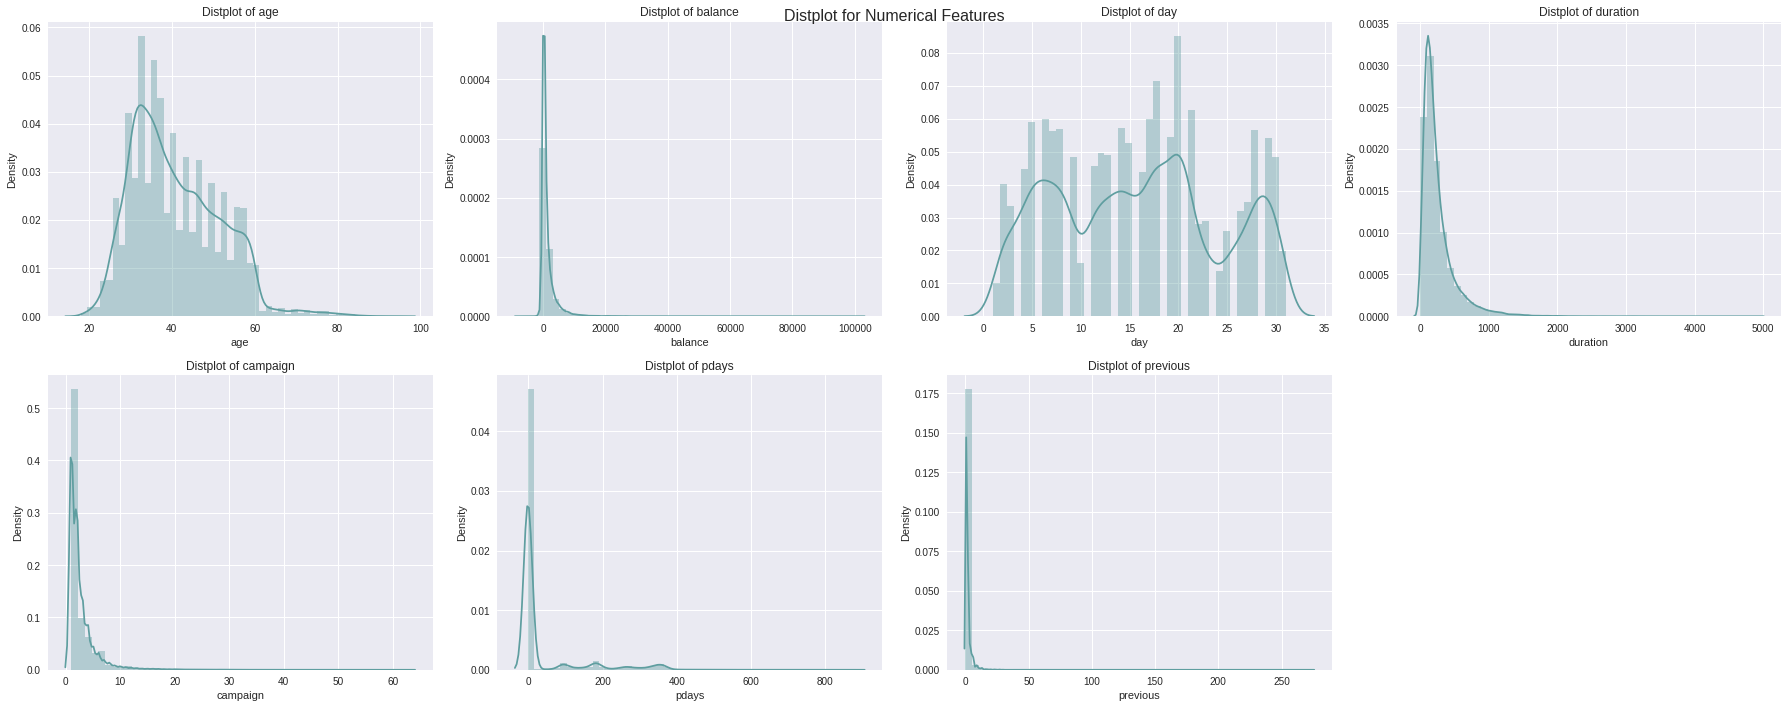

In [ ]:
# Membuat distplot untuk seluruh numerical features
plt.figure(figsize=(25, 10))
for i in range(0, len(nums)):
    plt.subplot(2,4, i+1)
    sns.distplot(df_train[nums[i]], color='cadetblue')
    plt.title('Distplot of {}'.format(nums[i]))
    plt.suptitle('Distplot for Numerical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout()
plt.show()

In [ ]:
#skewness value
for i in range(0, len(nums)):
    print(f"Skewness {df_train[nums].columns[i]} : {df_train[nums[i]].skew()}")

Skewness age : 0.6848179257252598
Skewness balance : 8.360308326166326
Skewness day : 0.09307901402122411
Skewness duration : 3.144318099423456
Skewness campaign : 4.898650166179674
Skewness pdays : 2.6157154736563477
Skewness previous : 41.84645447266292


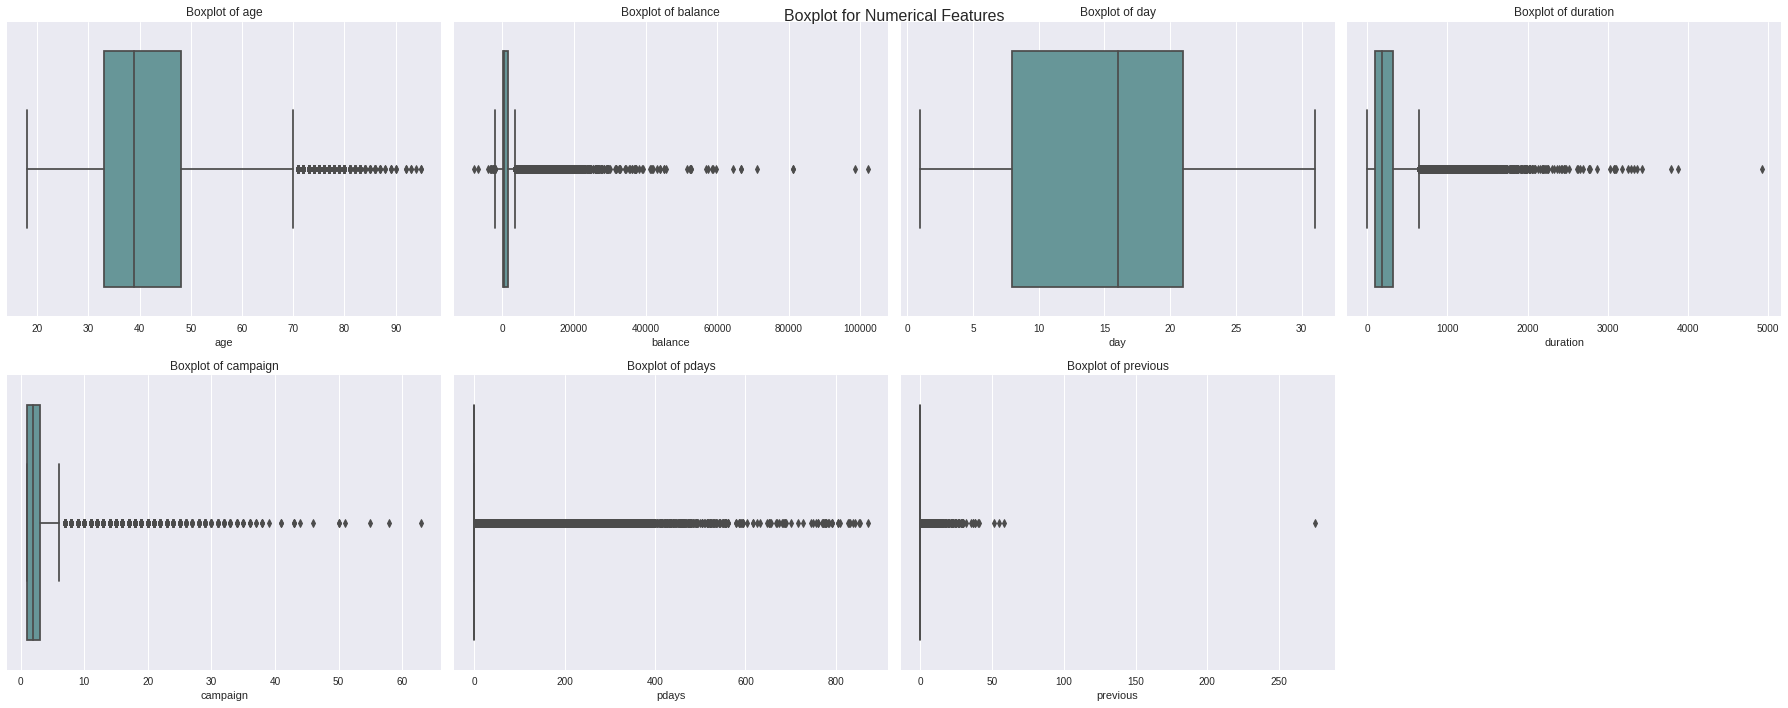

In [ ]:
# Membuat boxplot untuk seluruh numerical features
plt.figure(figsize=(25, 10))
for i in range(0, len(nums)):
    plt.subplot(2,4, i+1)
    sns.boxplot(df_train[nums[i]], color='cadetblue')
    plt.title('Boxplot of {}'.format(nums[i]))
    plt.suptitle('Boxplot for Numerical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout()
plt.show()

Dari hasil visualisasi distribution plot dan boxplot diatas, dapat diketahui bahwa:
- Hampir seluruh kolom numerikal memiliki jenis distribusi `positively skewed` atau `right-skewed`, kecuali untuk distribusi untuk kolom `day` dimana kolom tersebut memiliki jenis distribusi `multimodal`.
- Terlihat bahwa kolom `balance`, `duration`, `campaign`, `pdays` dan `previous` memiliki persebaran data yang cukup luas.
- Terdapat banyak value yang berpotensi sebagai outliers pada seluruh kolom numerikal, kecuali kolom `day` yang terlihat tidak memiliki outliers.
- Terdapat beberapa value yang berpotensi menjadi outliers ekstrim pada kolom `balance`, `duration` dan `previous`.
- Pada kolom `balance`, `duration`, `campaign` didominasi oleh nilai yang kecil. Variasi data yang banyak pada nilai tinggi membuat oulier menjadi semakin banyak.
- Pada kolom `pdays` memiliki nilai -1 (belum dihubungi sebelumnya) yang mendominasi yaitu 36954 dari 45211 baris atau sekitar 81.7% data sehingga kotak menjadi berpusat pada nilai -1 sehingga nilai-nilai diatas -1 menjadi oulier yang cukup banyak sekitar 18.3%.
- Pada kolom previous memiliki nilai 0 yang mendominasi yang sesuai dengan nilai -1 pada kolom pdays karena nilai ini memiliki korelasi yang kuat. Sehingga selain dari nilai 0 akan menjadi outlier. Namun ada satu nilai yang benar-benar sangat jauh yaitu 275 (outlier ini dapat dihapus karena hanya satu saja dan jaraknya sangat jauh).

Terdapat hal yang perlu difollow-up pada tahap data pre-processing, yaitu melakukan standarisasi ataupun normalisasi atau juga melakukan handling outliers. Sehingga perlu dilakukan analisis lebih lanjut

##### Categorical Features

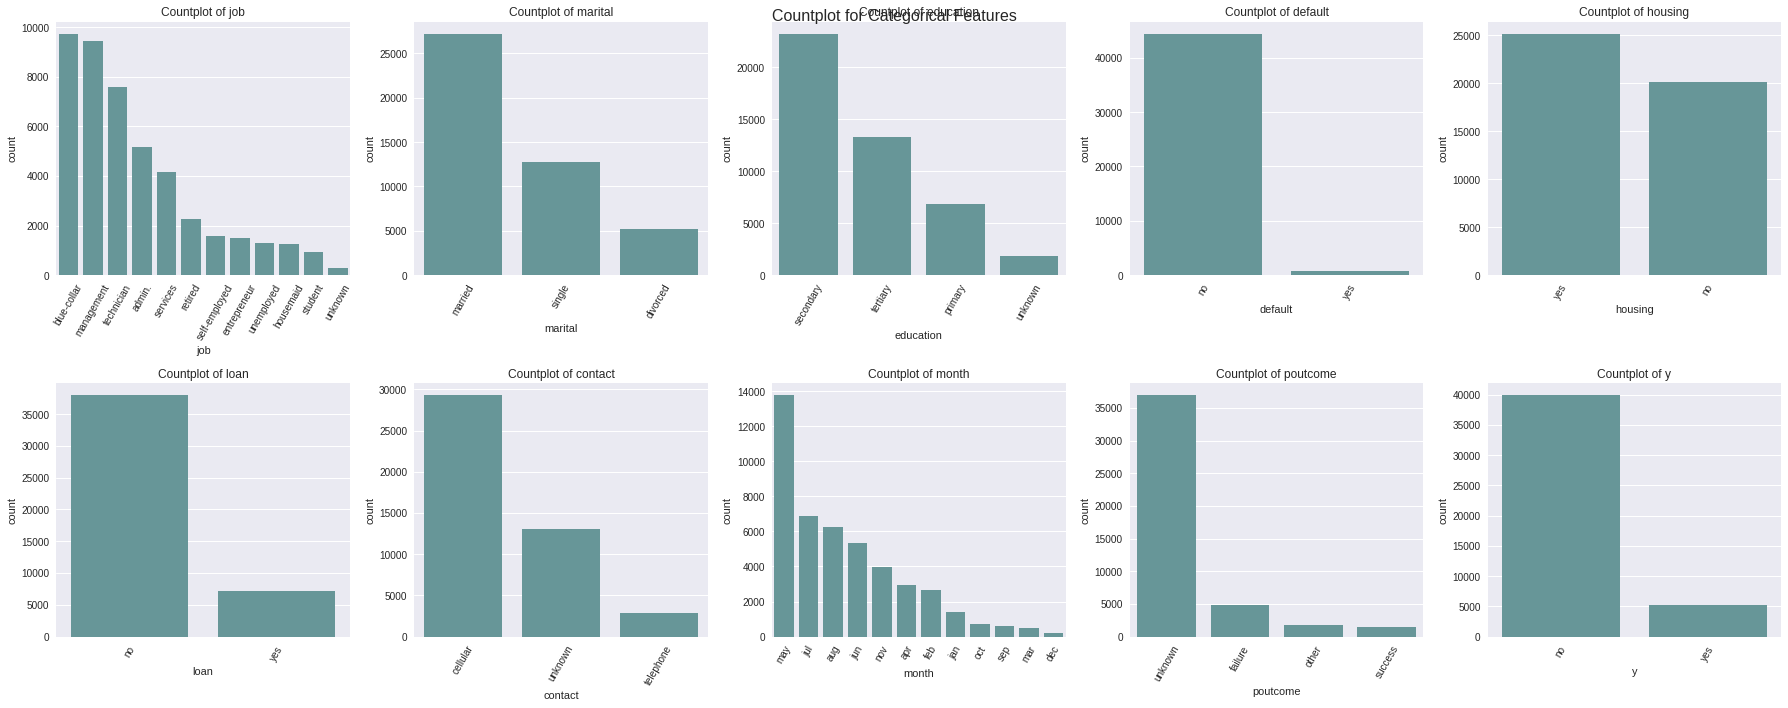

In [ ]:
# Membuat catplot untuk setiap kolom kategori
plt.figure(figsize=(25, 10))
for i in range(0, len(cats)):
    plt.subplot(2,5, i+1)
    sns.countplot(x=df_train[cats[i]], color='cadetblue', order = df_train[cats[i]].value_counts().index)
    plt.title('Countplot of {}'.format(cats[i]))
    plt.suptitle('Countplot for Categorical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout()
    plt.xticks(rotation = 60)

plt.show()

Dari barplot diatas diperoleh bahwa dari keseluruhan data kategorik:
1. Nasabah yang terbanyak berprofesi sebagai management
2. Nasabah dengan status sudah menikah merupakan klien yang terbanyak
3. pendidikan secondary merupakan yang paling banyak
4. default no lebih banyak dibandingkan yes
5. Nasabah yang memiliki cicilan rumah lebih banyak daripada yang tidak memiliki rumah
6. Nasabah dengan status tidak ada pinjaman lebih banyak dibandingkan yang memiliki pinjaman
7. Nasabah lebih banyak dihubungi melalui cellular daripada telephone dan unknown
8. bulan may merupakan bulan yang paling banyak dilakukan campaign
9. hasil dari kampanye pemasaran sebelumnya yang paling banyak adalah unknown

Selain itu dapat diketahui juga bahwa:
- Terdapat beberapa kategori **unkown** pada kolom `job`, `education`, `contact` dan `poutcome`. Dimana jumlah kategori **unkown** pada kolom `poutcome` cukup mendominasi.
- Kategori `no` pada kolom `default` cukup mendominasi. Dimana sebanyak 98% value adalah `no` yang menandakan bahwa hampir seluruh nasabah yang dihubungi adalah nasabah yang tidak memiliki kredit.

Terdapat hal yang perlu difollow-up pada tahap data pre-processing, yaitu:
- Mengubah tipe data kategorikal menjadi tipe data numerikal agar dapat dilihat korelasinya dengan kolom-kolom numerikal lainnya menggunakan heatmap dan juga melihat tipe skewness masing-masing kolom.
- Membuang kolom `month` dan `day` karena rentang waktu yang ada pada dataset ini adalah Mei 2008 sampai November 2010, selain itu juga tidak terdapat informasi tahun sehingga akan membuat data menjadi bias karena beberapa bulan memiliki lebih banyak data daripada bulan yang lain seperti bulan ei memiliki 3 data (Mei 2008, Mei 2009, Mei 2010) tetapi April hanya memiliki 2 data (April 2009, April 2010).

#### Multivariate Analysis

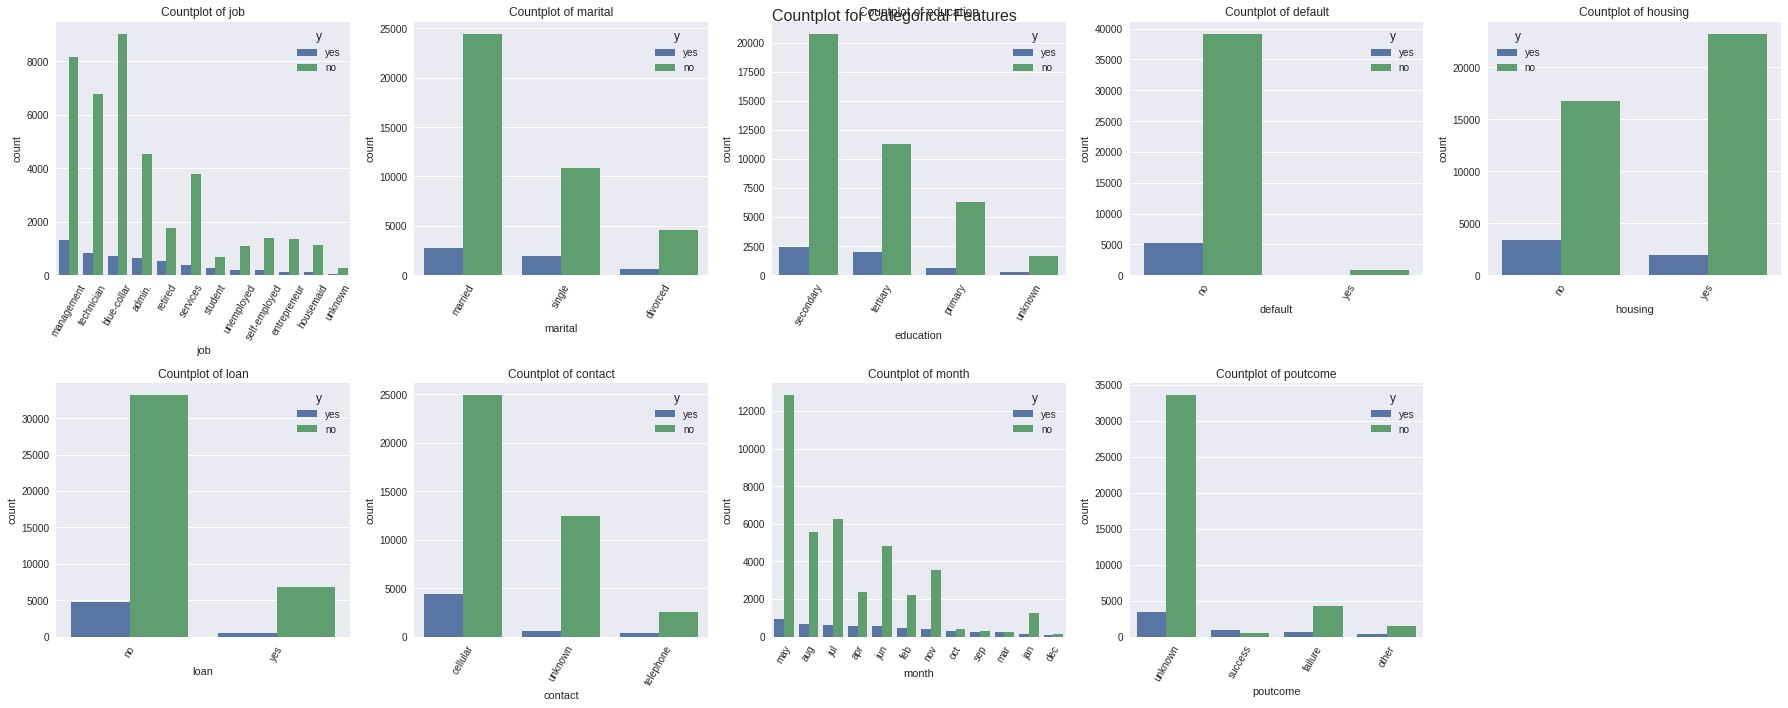

In [ ]:
# Membuat catplot untuk setiap kolom kategori
plt.figure(figsize=(25, 10))
for i in range(0, len(cats)-1):
    df_group = df_train.groupby('y')[cats[i]].value_counts().reset_index(name='count').sort_values(by=['y','count'], ascending=False).set_index([cats[i]])
    plt.subplot(2,5, i+1)
    sns.countplot(x=df_train[cats[i]], order = df_group.index[:int(len(df_group)/2)], hue=df_train['y'], hue_order=['yes', 'no'])
    plt.title('Countplot of {}'.format(cats[i]))
    plt.suptitle('Countplot for Categorical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout()
    plt.xticks(rotation = 60)
    
plt.show()

Dari hasil visualisasi Countplot untuk seluruh variable kategorikal terhadap output variable yaitu `y`, dapat diketahui bahwa:

**Grafik Job**  
Nasabah dengan pekerjaan `blue-collar` adalah nasabah yang paling banyak dihubungi. Jenis pekerjaan `blue-collar` memiliki jumlah nasabah yang tidak berlangganan paling tinggi sedangkan pekerjaan `management` memiliki jumlah nasabah yang berlangganan paling tinggi. Untuk rasio tertinggi antara nasabah yang berlangganan dan tidak ada pada pekerjaan `student`, sedangkan rasio terendah adalah nasabah dengan pekerjaan `blue-collar`. Secara keseluruhan nasabah yang tidak berlangganan selalu lebih tinggi dibandingkan nasabah yang berlangganan.

**Grafik Marital**  
Status `married` memiliki jumlah nasabah yang berlangganan dan tidak berlangganan tertinggi disusul oleh status `single` dan `divorced`

**Grafik Education**  
Pendidikan `secondary` memiliki jumlah nasabah yang berlangganan dan tidak berlangganan tertinggi dan `primary` merupakan tingkat pendidikan dengan jumlah pel.

**Grafik Default**  
Nasabah yang belum memiliki kredit sebelumnya memiliki jumlah nasabah yang berlangganan dan tidak berlangganan tertinggi dibandingkan nasabah yang sudah memiliki kredit sebelumnya.

**Grafik Housing**  
Nasabah yang tidak memiliki cicilan rumah lebih banyak yang berlangganan dibandingkan nasabah yang memiliki cicilan rumah.

**Grafik Loan**  
Nasabah yang tidak memiliki pinjaman pribadi lebih banyak yang berlangganan dibandingkan nasabah yang memiliki pinjaman pribadi.

**Grafik Contact**  
Nasabah yang dihubungi menggunakan jenis komunikasi 'cellular' memiliki jumlah nasabah yang berlangganan paling banyak dibandingkan jenis komunikasi lain.

**Grafik Month**  
Bulan May memiliki nasabah yang berlangganan dan tidak paling tinggi dibandingkan bulan lainnya.

**Grafik Poutcome**  
Yang mengalami keberhasilan dari kampanye sebelumnya memiliki rasio pembukaan deposito tertinggi.


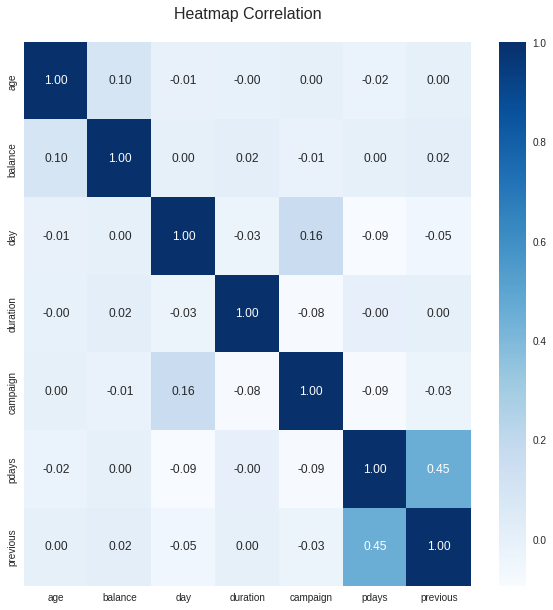

In [ ]:
# Membuat heatmap untuk melihat korelasi antar kolom numerikal
plt.figure(figsize=(10, 10))
sns.heatmap(df_train.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.title('Heatmap Correlation\n', fontsize=16)
plt.show()

<Figure size 1080x1080 with 0 Axes>

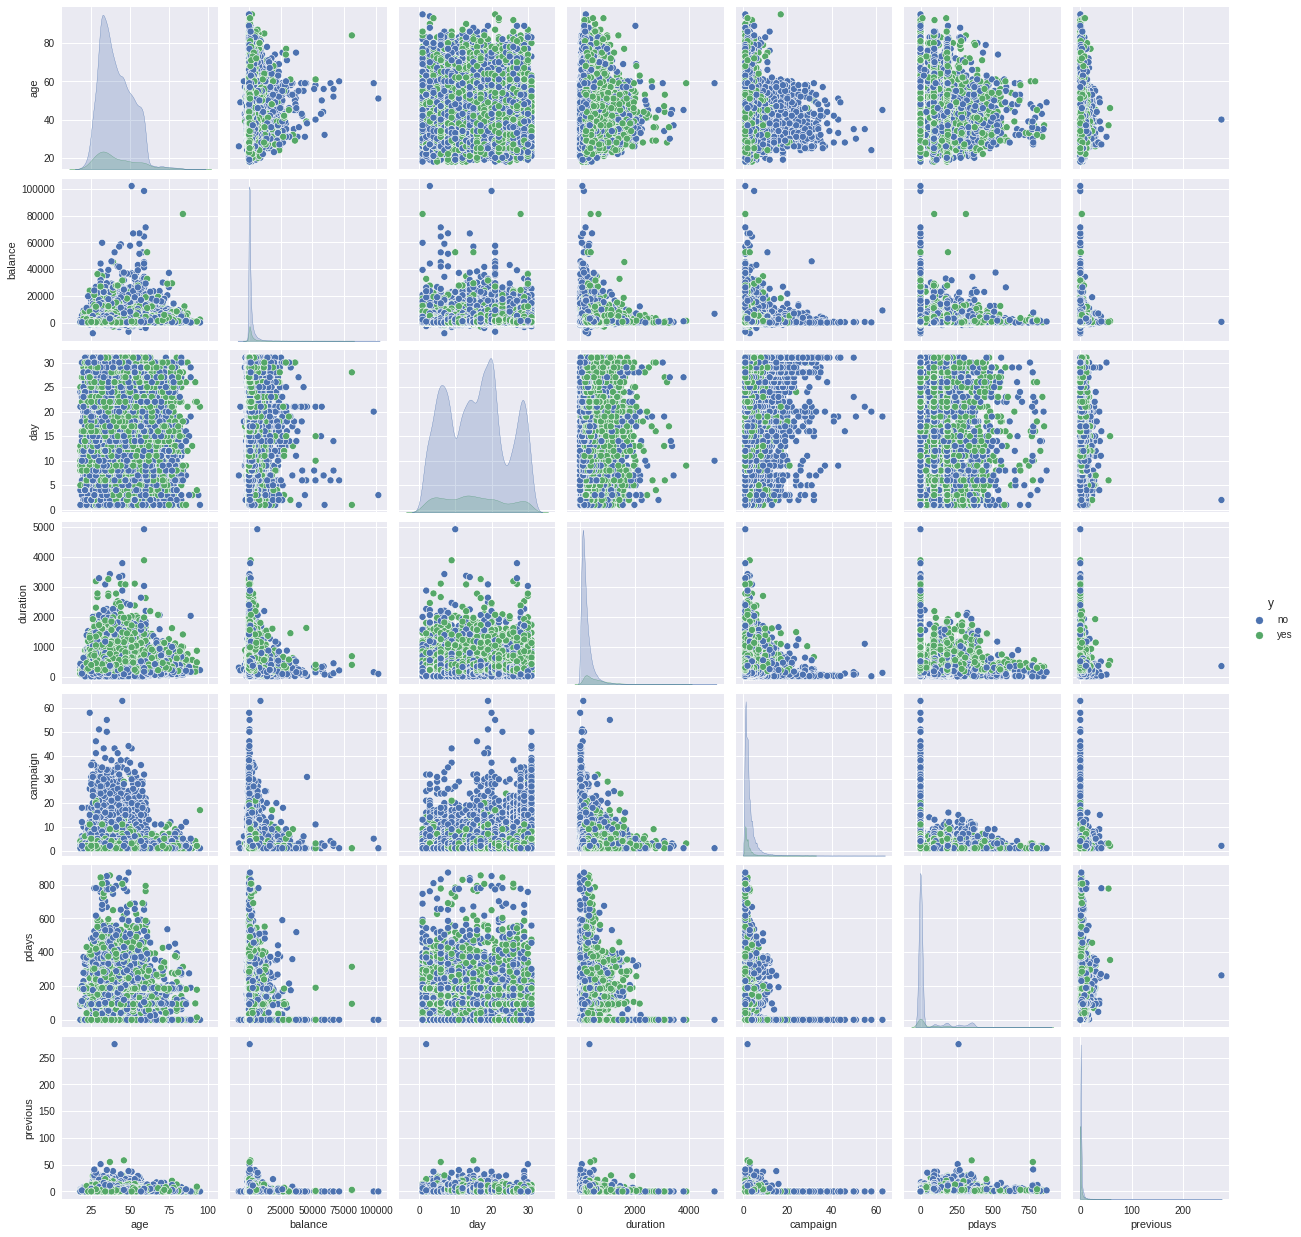

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_train, diag_kind='kde', hue='y')
plt.show()

Dari hasil visualisasi korelasi antar kolom numerikal dengan menggunakan heatmap dan pairplot diatas, dapat diketahui bahwa:
- Korelasi antara feature dan label lemah. 
- Korelasi antara feature lemah.
- Feature `pdays` dan `previous` memiliki korelasi positif yang moderat. Dimana korelasi ini merupakan korelasi paling tinggi dibandingkan dengan pasangan lainnya. Berdasarkan dari deskripsi feature, kedua feature tersebut berisi keterangan tentang campaign sebelumnya, terdapat potensi bahwa kedua feature tersebut redundant. Maka dari itu kolom `pdays` akan di drop karena berpotensi redundant dengan kolom `previous`.
- Melakukan pengubahan tipe data kategorikal menjadi numerikal.

### Business Insights and Visualizations

In [ ]:
def test(x):
    df_pro1 = df_train.groupby([x, 'y']).agg({'pdays':'count'}).reset_index().rename(columns={'pdays':'unique_customer'})
    df_pro2 = df_train.groupby([x]).agg({'pdays':'count'}).reset_index().rename(columns={'pdays':'total_customer'})

    df_pro = df_pro1.merge(df_pro2, how = 'inner', on=x)
    df_pro['percentage'] = round(df_pro['unique_customer'] / df_pro['total_customer'] * 100, 2)
    
    
    df_pro_pivot = df_pro.pivot_table(values=['unique_customer', 'percentage'], columns='y', index=x).reset_index()
    df_pro_pivot.columns = [x, 'no_perc', 'yes_perc', 'no_count', 'yes_count']
    df_pro_pivot = df_pro_pivot.fillna(0)
    df_pro_pivot['total_count'] = df_pro_pivot['no_count'] + df_pro_pivot['yes_count']
    return df_pro_pivot[[x, 'yes_count', 'no_count', 'yes_perc', 'no_perc', 'total_count']]

In [ ]:
age_ratio = test('age')
age_ratio.total_count.sum()

45211.0

In [ ]:
(age_ratio['yes_count'] + age_ratio['no_count']).sum()

45211.0

In [ ]:
age_ratio

,age,yes_count,no_count,yes_perc,no_perc,total_count
0,18,7.0,5.0,58.33,41.67,12.0
1,19,11.0,24.0,31.43,68.57,35.0
2,20,15.0,35.0,30.00,70.00,50.0
3,21,22.0,57.0,27.85,72.15,79.0
4,22,40.0,89.0,31.01,68.99,129.0
...,...,...,...,...,...,...
72,90,2.0,0.0,100.00,0.00,2.0
73,92,2.0,0.0,100.00,0.00,2.0
74,93,2.0,0.0,100.00,0.00,2.0
75,94,0.0,1.0,0.00,100.00,1.0


In [ ]:
def rasio(cat, yaxis_height=100, bar_color='cadetblue'):
    #Membuat visualisasi bar chart dan pie chart.
    style.use('seaborn')
    ##Mengurutkan data frame `df3_group_pivot` berdasarkan nilai churn secara descending.
    df_pro_pivot = test(cat)
    df_pro_pivot2 = df_pro_pivot.sort_values('yes_perc', ascending=False)

    ##Inisiasi variabel pendukung
    labels = list(df_pro_pivot2[cat])
    yes = df_pro_pivot2['yes_perc'].tolist()
    no = df_pro_pivot2['no_perc'].tolist()
    x = np.arange(len(labels)) # lokasi label
    width = 0.7 # lebar bar

    fig, ax1 = plt.subplots() #Inisiasi subplot 1 row 2 columns

    ##Membuat visualisasi barplot
    rects1 = ax1.bar(x, yes, width, label='Yes', color=bar_color)

    ## Inisiasi figure size
    fig.set_figheight(8)
    fig.set_figwidth(15)

    ## Menambahkan labels, title dan custom x-axis tick labels, dan sebagainya.
    ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
    ax1.set_facecolor('white')
    ax1.set_ylabel('Ratio (%)',fontsize=13)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, fontsize=13)
    #ax1.bar_label(rects1, padding=10, fontsize=13, bbox = dict(facecolor = 'lightgray', alpha = .5))
    ax1.set_ylim([0, yaxis_height])
    plt.yticks(fontsize=13)

In [ ]:
def ratio_count(cat, percent_height=100, bar_color='cadetblue', fig_row=1, fig_col=1, h_space=0.5):
    #Membuat visualisasi
    style.use('seaborn')

    fig, (ax1, ax2) = plt.subplots(fig_row, fig_col) #Inisiasi subplot 1 row 2 columns
    ## Inisiasi figure size
    fig.set_figheight(15)
    fig.set_figwidth(20)

    ##Mengurutkan data frame `df3_group_pivot` berdasarkan nilai churn secara descending.
    df_pro_pivot = test(cat)
    df_pro_pivot2 = df_pro_pivot.sort_values('yes_perc', ascending=False)

    ##Inisiasi variabel pendukung
    labels = list(df_pro_pivot2[cat])
    yes = df_pro_pivot2['yes_perc'].tolist()
    no = df_pro_pivot2['no_perc'].tolist()
    x = np.arange(len(labels)) # lokasi label
    width = 0.7 # lebar bar

    ##Membuat visualisasi barplot
    rects1 = ax1.bar(x, yes, width, label='Yes', color=bar_color)

    ## Menambahkan labels, title dan custom x-axis tick labels, dan sebagainya.
    ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
    ax1.set_facecolor('whitesmoke')
    ax1.set_ylabel('Ratio (%)',fontsize=13)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, fontsize=13)
    #ax1.bar_label(rects1, padding=10, fontsize=13, bbox = dict(facecolor = 'lightgray', alpha = .5))
    ax1.set_ylim([0, percent_height])
    ax1.set_xlabel(cat)
    # ax1.set_title('Rasio Pembukaan Akun Deposito berdasarkan Jenis Pekerjaan Nasabah')

    #Visualisasi Countplot
    df_pro_pivot3 = test(cat)
    df_pro_pivot4 = df_pro_pivot.sort_values('total_count', ascending=False)

    ##Inisiasi variabel pendukung
    labels2 = list(df_pro_pivot2[cat])
    yes2 = df_pro_pivot2['yes_count'].tolist()
    no2 = df_pro_pivot2['no_count'].tolist()
    x2 = np.arange(len(labels)) # lokasi label
    width2 = 0.4 # lebar bar

    ##Membuat visualisasi barplot
    rects3 = ax2.bar(x - width2/2, yes2, width2, label='Yes', color='cadetblue')
    rects4 = ax2.bar(x + width2/2, no2, width2, label='No', color='darkseagreen')

    ax2.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
    ax2.set_facecolor('whitesmoke')
    ax2.set_ylabel('Count',fontsize=13)
    ax2.set_xticks(x)
    ax2.set_xticklabels(labels, fontsize=13)
    #ax2.bar_label(rects3, padding=10, fontsize=10, bbox = dict(facecolor = 'lightgray', alpha = .5))
    #ax2.bar_label(rects4, padding=10, fontsize=10, bbox = dict(facecolor = 'lightgray', alpha = .5))
    ax2.set_ylim([0, df_train[cat].value_counts().max()*1.01])
    plt.legend()
    plt.yticks(fontsize=10)
    
    plt.subplots_adjust(hspace=h_space)
    plt.xlabel(cat)
    return fig, (ax1, ax2)

#### Customer Decision after Telemarketing Analysis

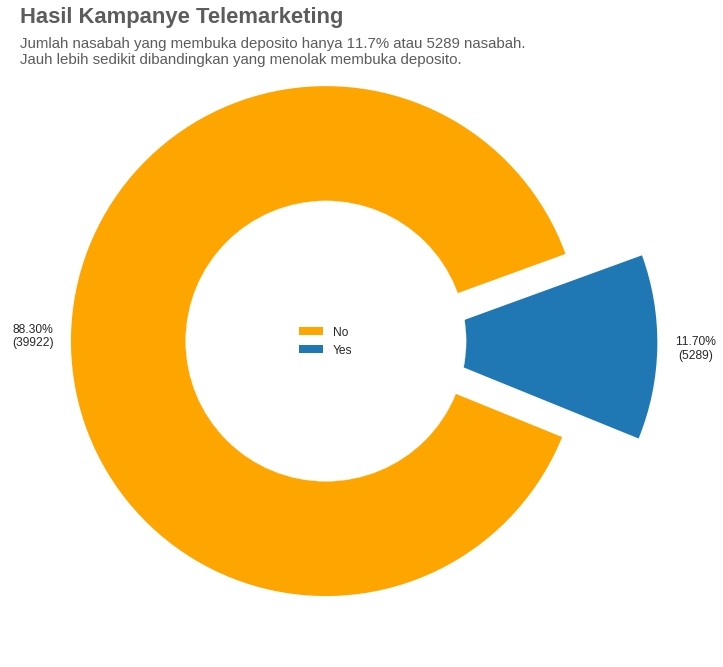

In [ ]:
df_group_target = df_train.groupby('y').agg({'age':'count'}).reset_index().rename(columns={'age':'count'})
df_group_target['percentage'] = df_group_target['count']/len(df_train)*100
target = df_group_target['count']

# Creating autocpt arguments
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

# Creating plot
plt.figure(figsize=(10,10), facecolor='white')
plt.rcParams['font.size'] = 12
plt.pie(target,
        autopct = make_autopct(target),
        explode=[0, 0.3],
        colors=['orange', 'tab:blue'], 
        pctdistance=1.15,
        startangle=20)
circle = plt.Circle( (0,0), 0.55, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
# plt.title('Deposit Taken Pie Chart')
plt.legend(labels=['No','Yes'], loc='center', fontsize=12)
plt.text(x = -1.2, y = 1.25, s = "Hasil Kampanye Telemarketing",
               fontsize = 22, weight = 'bold', alpha = .75)
plt.text(x = -1.2, y = 1.09, s = "Jumlah nasabah yang membuka deposito hanya 11.7% atau 5289 nasabah. \nJauh lebih sedikit dibandingkan yang menolak membuka deposito.",
               fontsize = 15, alpha = .75)

plt.tight_layout()
plt.show()

#### Job Type Analysis on Term Deposit Account Subscriptions

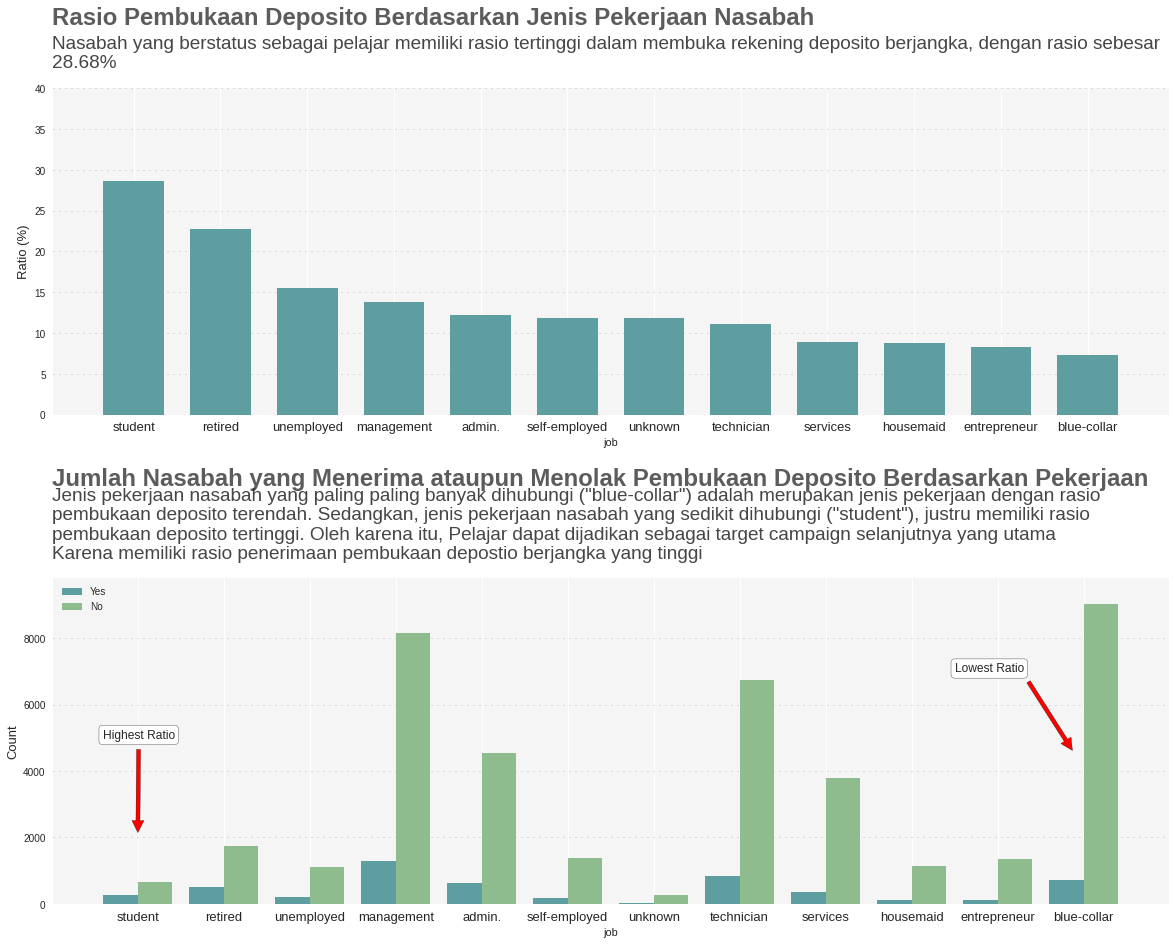

In [ ]:
ratio_count('job', percent_height=40, fig_row=2, fig_col=1)
plt.text(x = -1, y = 26500, s = "Rasio Pembukaan Deposito Berdasarkan Jenis Pekerjaan Nasabah",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -1, y = 25200,
               s = 'Nasabah yang berstatus sebagai pelajar memiliki rasio tertinggi dalam membuka rekening deposito berjangka, dengan rasio sebesar \n28.68%',
              fontsize = 19, alpha = .85)
plt.text(x = -1, y = 12600, s = "Jumlah Nasabah yang Menerima ataupun Menolak Pembukaan Deposito Berdasarkan Pekerjaan",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -1, y = 10400,
               s = 'Jenis pekerjaan nasabah yang paling paling banyak dihubungi ("blue-collar") adalah merupakan jenis pekerjaan dengan rasio \npembukaan deposito terendah. Sedangkan, jenis pekerjaan nasabah yang sedikit dihubungi ("student"), justru memiliki rasio \npembukaan deposito tertinggi. Oleh karena itu, Pelajar dapat dijadikan sebagai target campaign selanjutnya yang utama\nKarena memiliki rasio penerimaan pembukaan depostio berjangka yang tinggi',
              fontsize = 19, alpha = .85)

plt.annotate('Highest Ratio', xy =(0, 2000),
                xytext =(-0.41, 5000), 
                arrowprops = dict(facecolor ='red', shrink=0.05),
                fontsize=12, bbox = dict(boxstyle ="round", fc ="1"))

plt.annotate('Lowest Ratio', xy =(10.9
                                  , 4500),
                xytext =(9.5, 7000), 
                arrowprops = dict(facecolor ='red', shrink=0.05),
                fontsize=12, bbox = dict(boxstyle ="round", fc ="1"))

plt.show()

#### Marital Status Analysis on Term Deposit Account Subscriptions

In [ ]:
df_train.groupby('marital')['y'].count()

marital
divorced     5207
married     27214
single      12790
Name: y, dtype: int64

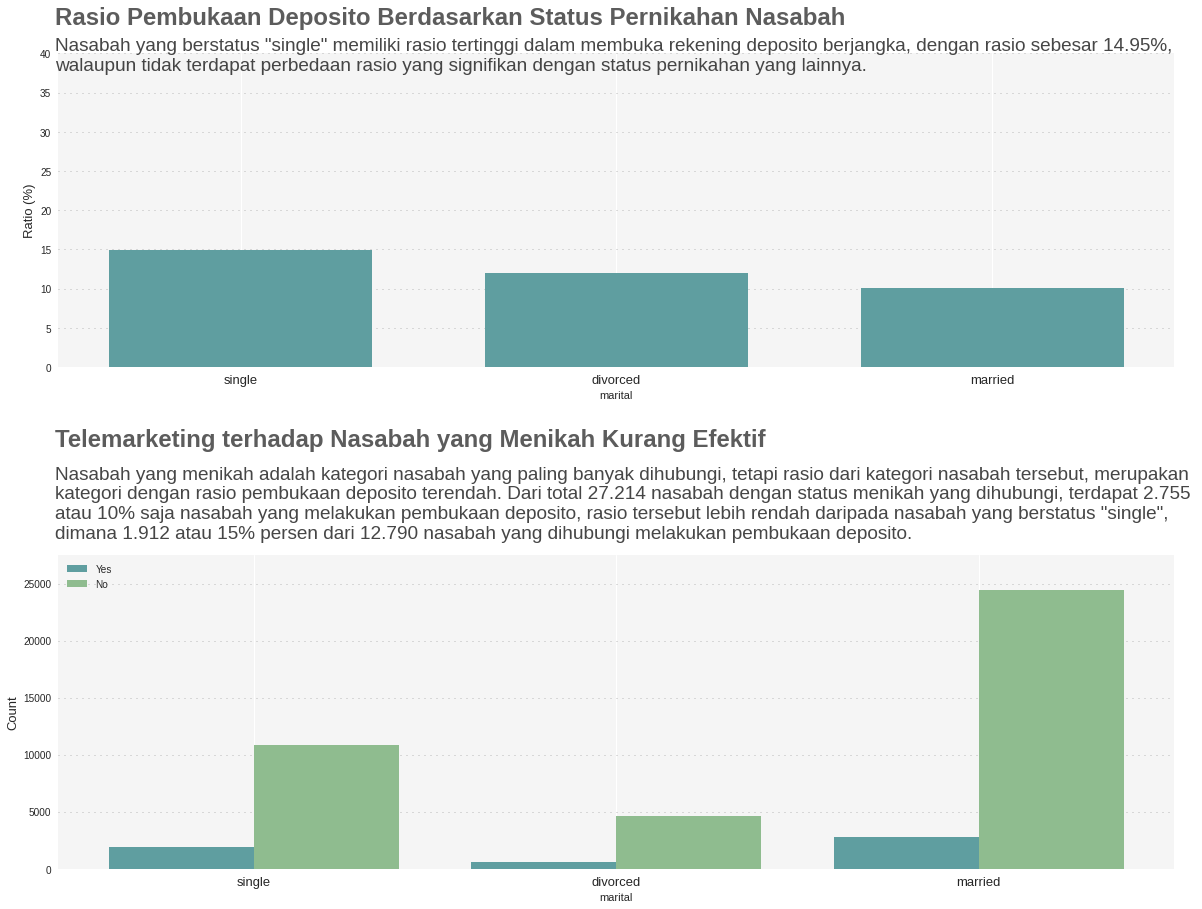

In [ ]:
ratio_count('marital', percent_height=40, fig_row=2, fig_col=1, h_space=0.6)
plt.text(x = -0.55, y = 74000, s = "Rasio Pembukaan Deposito Berdasarkan Status Pernikahan Nasabah",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -0.55, y = 70000,
               s = 'Nasabah yang berstatus "single" memiliki rasio tertinggi dalam membuka rekening deposito berjangka, dengan rasio sebesar 14.95%, \nwalaupun tidak terdapat perbedaan rasio yang signifikan dengan status pernikahan yang lainnya.',
              fontsize = 19, alpha = .85)
plt.text(x = -0.55, y = 37000, s = "Telemarketing terhadap Nasabah yang Menikah Kurang Efektif",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -0.55, y = 29000,
               s = 'Nasabah yang menikah adalah kategori nasabah yang paling banyak dihubungi, tetapi rasio dari kategori nasabah tersebut, merupakan \nkategori dengan rasio pembukaan deposito terendah. Dari total 27.214 nasabah dengan status menikah yang dihubungi, terdapat 2.755 \natau 10% saja nasabah yang melakukan pembukaan deposito, rasio tersebut lebih rendah daripada nasabah yang berstatus "single", \ndimana 1.912 atau 15% persen dari 12.790 nasabah yang dihubungi melakukan pembukaan deposito.',
              fontsize = 19, alpha = .85)

# plt.annotate('Highest Ratio', xy =(0, 2000),
#                 xytext =(-0.41, 5000), 
#                 arrowprops = dict(facecolor ='red', shrink=0.05),
#                 fontsize=12, bbox = dict(boxstyle ="round", fc ="1"))

# plt.annotate('Lowest Ratio', xy =(10.9
#                                   , 4500),
#                 xytext =(9.5, 7000), 
#                 arrowprops = dict(facecolor ='red', shrink=0.05),
#                 fontsize=12, bbox = dict(boxstyle ="round", fc ="1"))

plt.show()

#### Education Background Analysis on Term Deposit Account Subscriptions

Text(0.35, 27, 'Highest Ratio')

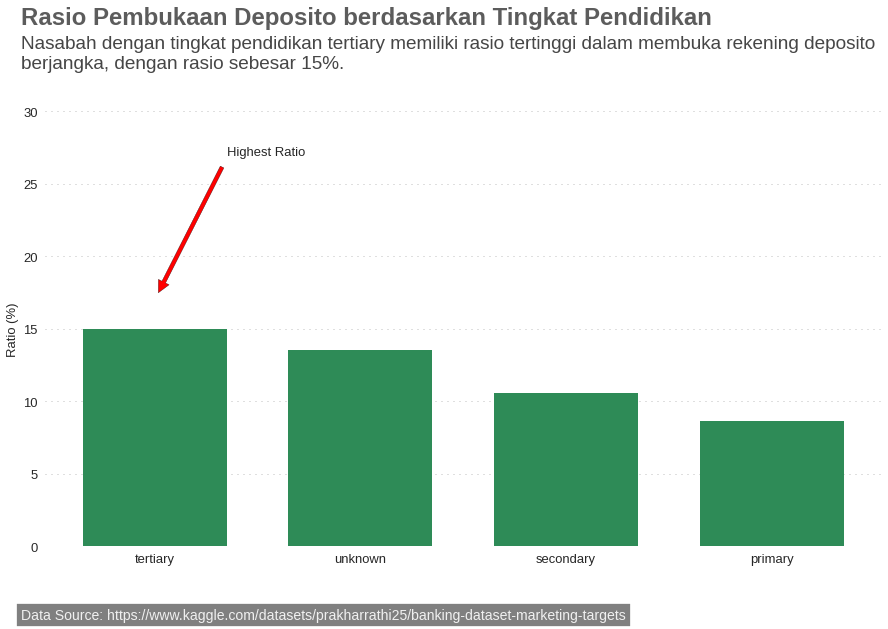

In [ ]:
rasio('education', 30, 'seagreen')

## Menambahkan judul dan unsur grafis lainnya
plt.text(x = -0.65, y = 36, s = "Rasio Pembukaan Deposito berdasarkan Tingkat Pendidikan",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -0.65, y = 33,
               s = 'Nasabah dengan tingkat pendidikan tertiary memiliki rasio tertinggi dalam membuka rekening deposito \nberjangka, dengan rasio sebesar 15%. ',
              fontsize = 19, alpha = .85)
plt.text(x = -0.65, y = -5,
    s = 'Data Source: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
plt.annotate('Highest Ratio', xy =(0, 17),
                xytext =(0.35, 27), 
                arrowprops = dict(facecolor ='red',
                                  shrink = 0.05),
                fontsize=13)

#### Duration Analysis on Term Deposit Account Subscriptions

In [ ]:
df_yes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,5289.0,41.670070,13.497781,18.0,31.0,38.0,50.0,95.0
balance,5289.0,1804.267915,3501.104777,-3058.0,210.0,733.0,2159.0,81204.0
day,5289.0,15.158253,8.501875,1.0,8.0,15.0,22.0,31.0
duration,5289.0,537.294574,392.525262,8.0,244.0,426.0,725.0,3881.0
campaign,5289.0,2.141047,1.921826,1.0,1.0,2.0,3.0,32.0
pdays,5289.0,68.702968,118.822266,-1.0,-1.0,-1.0,98.0,854.0
previous,5289.0,1.170354,2.553272,0.0,0.0,0.0,1.0,58.0


In [ ]:
len(df_yes[(df_yes['duration'] >= 120) & (df_yes['duration'] <= 540)])/len(df_yes)

0.5674040461334846

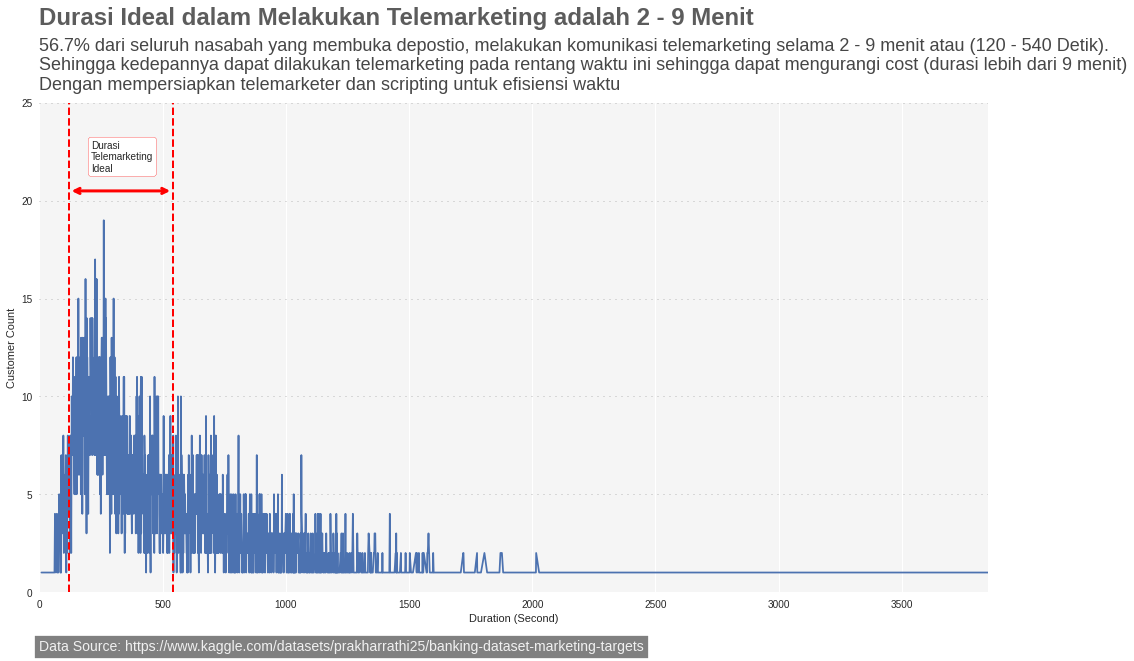

In [ ]:
df_plot = df_yes.groupby('duration').agg({'y':'count'}).reset_index().sort_values('y')

fig, ax1 = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(17)

sns.lineplot(data=df_plot, x='duration', y='y')
plt.ylabel('Customer Count')
plt.xlabel('Duration (Second)')
plt.axvline(x=120, linewidth=2, color='red', linestyle='--')
plt.axvline(x=540, linewidth=2, color='red', linestyle='--')
plt.xlim(0, 3850)
plt.ylim(0, 25)

ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
ax1.set_facecolor('whitesmoke')
    
plt.text(x = -0.65, y = 29, s = "Durasi Ideal dalam Melakukan Telemarketing adalah 2 - 9 Menit",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -0.65, y = 25.7,
               s = '56.7% dari seluruh nasabah yang membuka depostio, melakukan komunikasi telemarketing selama 2 - 9 menit atau (120 - 540 Detik).\nSehingga kedepannya dapat dilakukan telemarketing pada rentang waktu ini sehingga dapat mengurangi cost (durasi lebih dari 9 menit)\nDengan mempersiapkan telemarketer dan scripting untuk efisiensi waktu',
              fontsize = 18, alpha = .85)
plt.text(x = -0.65, y = -3,
    s = 'Data Source: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

plt.annotate('', xy =(122, 20.5),
                xytext =(539, 20.5), 
                arrowprops = dict(arrowstyle="<->", connectionstyle="arc3", color='r', lw=3),
                fontsize=13)

plt.text(x = 210, y = 21.5,
    s = 'Durasi\nTelemarketing\nIdeal',fontsize = 10, bbox = dict(boxstyle ="round", fc ="1", color='r'))
plt.savefig('bizinsight1.png')
plt.show()


In [ ]:
df_pro1 = df_train.groupby(['duration', 'y']).agg({'age':'count'}).reset_index().rename(columns={'age':'unique_customer'})
df_pro2 = df_train.groupby(['duration']).agg({'age':'count'}).reset_index().rename(columns={'age':'total_customer'})

df_pro = df_pro1.merge(df_pro2, how = 'inner', on='duration')
df_pro['percentage'] = round(df_pro['unique_customer'] / df_pro['total_customer'] * 100, 2)

In [ ]:
df_ratio_dura = test('duration')
df_ratio_dura

,duration,yes_count,no_count,yes_perc,no_perc,total_count
0,0,0.0,3.0,0.0,100.0,3.0
1,1,0.0,2.0,0.0,100.0,2.0
2,2,0.0,3.0,0.0,100.0,3.0
3,3,0.0,4.0,0.0,100.0,4.0
4,4,0.0,15.0,0.0,100.0,15.0
...,...,...,...,...,...,...
1568,3366,0.0,1.0,0.0,100.0,1.0
1569,3422,0.0,1.0,0.0,100.0,1.0
1570,3785,0.0,1.0,0.0,100.0,1.0
1571,3881,1.0,0.0,100.0,0.0,1.0


#### Number of Contact During this Campaign Analysis on Term Deposit Account Subscriptions

In [ ]:
len(df_yes[(df_yes['campaign'] >= 1) & (df_yes['campaign'] <= 3)])/len(df_yes)

0.8659481943656646

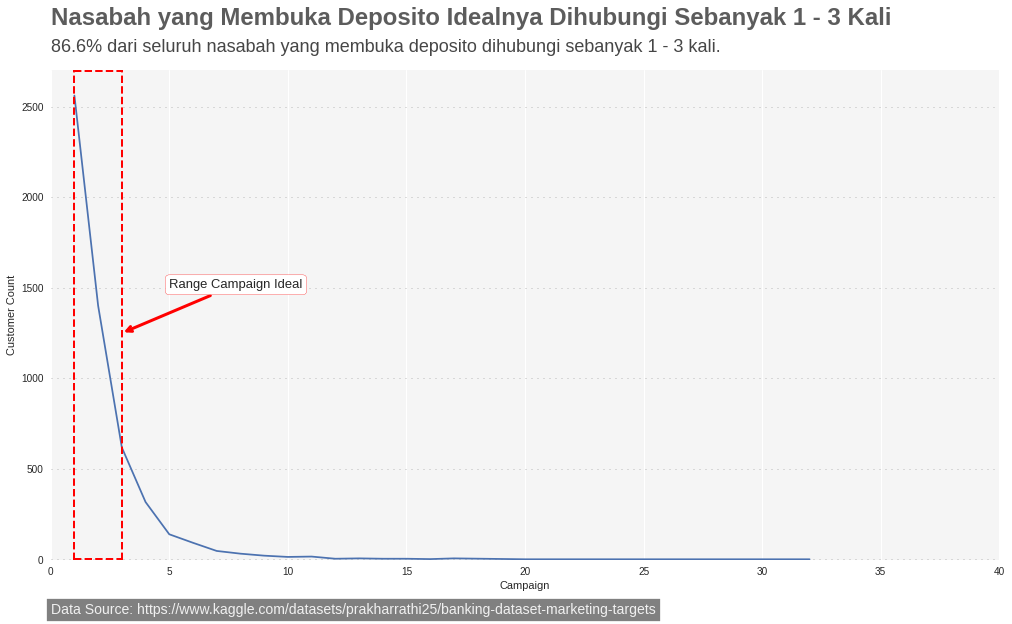

In [ ]:
from matplotlib.patches import Rectangle

df_plot = df_yes.groupby('campaign').agg({'y':'count'}).reset_index().sort_values('y')

fig, ax1 = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(17)

sns.lineplot(data=df_plot, x='campaign', y='y')
plt.ylabel('Customer Count')
plt.xlabel('Campaign')
plt.axvline(x=1, linewidth=2, color='red', linestyle='--')
plt.axvline(x=3, linewidth=2, color='red', linestyle='--')
ax1.hlines(xmin=1, xmax=3, y=2695, linewidth=2, color='red', linestyle='--')
ax1.hlines(xmin=1, xmax=3, y=0, linewidth=2, color='red', linestyle='--')
plt.xlim(0, 40)
plt.ylim(-1, 2700)

ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
ax1.set_facecolor('whitesmoke')
    
plt.text(x = 0, y = 2950, s = "Nasabah yang Membuka Deposito Idealnya Dihubungi Sebanyak 1 - 3 Kali",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = 0, y = 2800,
               s = '86.6% dari seluruh nasabah yang membuka deposito dihubungi sebanyak 1 - 3 kali.',
              fontsize = 18, alpha = .85)
plt.text(x = 0, y = -300,
    s = 'Data Source: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

plt.annotate('Range Campaign Ideal', xy =(3, 1250),
                xytext =(5, 1500), 
                arrowprops = dict(arrowstyle="->", connectionstyle="arc3", color='r', lw=3),
                fontsize=13, bbox = dict(boxstyle ="round", fc ="1", color='r'))


# plt.text(x = -0.65, y = 21.5,
#     s = 'Ideal\nTelemarketing\nDuration',fontsize = 10, bbox = dict(boxstyle ="round", fc ="1", color='r'))
# plt.savefig('bizinsight2.png')
plt.show()

#### Customer Age Analysis on Term Deposit Account Subscriptions

In [ ]:
len(df_yes[(df_yes['age'] >= 25) & (df_yes['age'] <= 40)])/len(df_yes)

0.5199470599357157

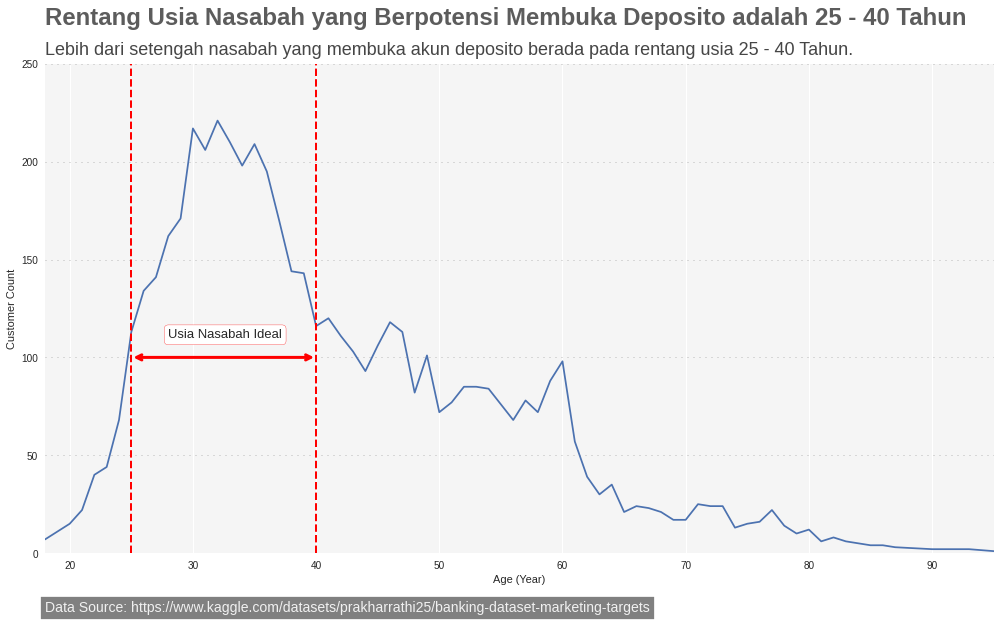

In [ ]:
df_plot = df_yes.groupby('age').agg({'y':'count'}).reset_index().sort_values('y')

fig, ax1 = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(17)

sns.lineplot(data=df_plot, x='age', y='y')
plt.ylabel('Customer Count')
plt.xlabel('Age (Year)')
plt.axvline(x=25, linewidth=2, color='red', linestyle='--')
plt.axvline(x=40, linewidth=2, color='red', linestyle='--')
plt.xlim(18, 95)
plt.ylim(0, 250)

ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
ax1.set_facecolor('whitesmoke')
    
plt.text(x = 18, y = 270, s = "Rentang Usia Nasabah yang Berpotensi Membuka Deposito adalah 25 - 40 Tahun",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = 18, y = 255,
               s = 'Lebih dari setengah nasabah yang membuka akun deposito berada pada rentang usia 25 - 40 Tahun.',
              fontsize = 18, alpha = .85)
plt.text(x = 18, y = -30,
    s = 'Data Source: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

plt.annotate('', xy =(25, 100),
                xytext =(40, 100), 
                arrowprops = dict(arrowstyle="<->", connectionstyle="arc3", color='r', lw=3),
                fontsize=13)

plt.text(x = 28, y = 110,
    s = 'Usia Nasabah Ideal',fontsize = 13, bbox = dict(boxstyle ="round", fc ="1", color='r'))
plt.savefig('bizinsight3.png')
plt.show()

In [ ]:
df2 = df_train.copy()

In [ ]:
def dura_cat(x):
    if (x['duration'] > 258):
        dura_cat = 'Above Mean'
    else:
        dura_cat = 'Below Mean'
    return dura_cat


df2['dura_above_mean'] = df2.apply(lambda x: dura_cat(x), axis=1)

df2_group = df2.groupby(['dura_above_mean', 'y']).agg({'age':'count'}).reset_index().rename(columns={'age':'customer count'})
df2_group

,dura_above_mean,y,customer count
0,Above Mean,no,11205
1,Above Mean,yes,3827
2,Below Mean,no,28717
3,Below Mean,yes,1462


In [ ]:
dfs1 = df2.groupby(['dura_above_mean', 'y'])['age'].count().reset_index(name='UniqueCustomer')
dfs2 = df2.groupby(['dura_above_mean'])['age'].count().reset_index(name='AllUniqueCustomer')

dfs = dfs1.merge(dfs2, how = 'inner', on='dura_above_mean')
dfs['PercentUniqueCustomer'] = round(dfs['UniqueCustomer']*100.0/dfs['AllUniqueCustomer'], 2) 

dfs.head()

,dura_above_mean,y,UniqueCustomer,AllUniqueCustomer,PercentUniqueCustomer
0,Above Mean,no,11205,15032,74.54
1,Above Mean,yes,3827,15032,25.46
2,Below Mean,no,28717,30179,95.16
3,Below Mean,yes,1462,30179,4.84


In [ ]:
df3 = df_train.copy()

In [ ]:
def dura_cat(x):
    if (x['duration'] > 180):
        dura_cat = 'Above Median'
    else:
        dura_cat = 'Below Median'
    return dura_cat
        
df3['dura_above_med'] = df3.apply(lambda x: dura_cat(x), axis=1)

In [ ]:
df3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,dura_above_med
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Above Median
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Below Median
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Below Median
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Below Median
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Above Median
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,Above Median
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,Above Median
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,Above Median
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,Above Median


In [ ]:
dfs1 = df3.groupby(['dura_above_med', 'y'])['age'].count().reset_index(name='UniqueCustomer')
dfs2 = df3.groupby(['dura_above_med'])['age'].count().reset_index(name='AllUniqueCustomer')

dfs = dfs1.merge(dfs2, how = 'inner', on='dura_above_med')
dfs['PercentUniqueCustomer'] = round(dfs['UniqueCustomer']*100.0/dfs['AllUniqueCustomer'], 2) 

dfs.head()

,dura_above_med,y,UniqueCustomer,AllUniqueCustomer,PercentUniqueCustomer
0,Above Median,no,17971,22551,79.69
1,Above Median,yes,4580,22551,20.31
2,Below Median,no,21951,22660,96.87
3,Below Median,yes,709,22660,3.13


#### Insight yang Paling berdampak terhadap business
Karena dalam hal ini adalah berkaitan dengan telemarketing sehingga insight yang paling berdampak terhadap bisnis disini adalah durasi telemarketing. Semakin lama durasi telemarketing maka akan semakin banyak cost yang dikeluarkan. Oleh karena itu durasi telemarketing yang disarankan adalah 2 - 9 menit.   
Untuk menentukan apakah ada perbedaan yang signifikan jumlah customer yang menerima penawaran pada customer yang dihubungi 2 - 9 menit dengan customer yang dihubungi di luar rentang waktu tersebut maka dilakukan uji hipotesis.

`H0 : tidak ada perbedaan yang signifikan jumlah customer yang dihubungi 2 - 9 menit dengan durasi waktu yang lainnya terhadap penerimaan tawaran pembukaan deposito.`

`H1 : Terdapat perbedaan yang signifikan jumlah customer yang dihubungi 2 - 9 menit dengan durasi waktu yang lainnya terhadap penerimaan tawaran pembukaan deposito.`

In [ ]:
df2 = df_train.copy()
duration_cut = []
for x in df2["duration"]:
    if 120 <= x <=540 :
        duration_cut.append("2-9")
    else:
        duration_cut.append("Lain")

df2['duration_cut'] = duration_cut
df2['y'] = df2['y'].replace(['yes','no'],[1,0])
lain = df2[df2['duration_cut']=='Lain']
test = df2[df2['duration_cut']=='2-9']

In [ ]:
n_success_lain = lain['y'].sum()
n_success_test = test['y'].sum()

n_obs_lain = lain['y'].count()
n_obs_test = test['y'].count()


#------------------------

success = np.array([n_success_lain,n_success_test])
obs = np.array([n_obs_lain,n_obs_test])
print(success)
print(obs)

#----------------------
stats,pvalue = sp.proportions_ztest(success,obs)

#---------------------
print('AB Tetsing')
print('P-Value : {0:0.4f}'.format(pvalue))
if pvalue >= 0.05:
    print('Insufficient to reject H0')
else :
    print('Sufficient to reject H0')
    
#---------------tTest
print('----'*25)
ttest=st.ttest_ind(a=test['y'],b=lain['y'])
tvalue= ttest.pvalue

print('T-test')
print('P-Value : {0:0.4f}'.format(tvalue))
if tvalue >= 0.05:
    print('Insufficient to reject H0')
else :
    print('Sufficient to reject H0')

[2288 3001]
[18554 26657]
AB Tetsing
P-Value : 0.0005
Sufficient to reject H0
----------------------------------------------------------------------------------------------------
T-test
P-Value : 0.0005
Sufficient to reject H0


Sehingga dari uji AB testing dan T-test di atas dapat diketahui bahawa nilai p-values < 0.05 maka H0 ditolak dan didapatkan kesimpulan bahwa terdapat perbedaan yang signifikan jumlah customer yang dihubungi 2 - 9 menit dengan durasi waktu yang lainnya terhadap penerimaan tawaran pembukaan deposito.

<h2> <img src="https://drive.google.com/uc?id=1BgbZhNrrM7tlO0AvbjzXIX4R0ge23MJf"/>
</h2>

## Membangun Model 1 (Remove Outliers)

In [ ]:
URL_train ='https://drive.google.com/file/d/1l21D_27PqZYwf6WWUz671RytUhyAUNMp/view?usp=sharing'
train = 'https://drive.google.com/uc?export=download&id='+URL_train.split('/')[-2]
df_train = pd.read_csv(train,delimiter=';')

### Data Preprocessing

#### Drop Kolom

Karena tidak ada data tahun pada dataset yang dapat menyebabkan bias informasi maka dilakukan penghapusan kolom `day`, `month`, dan `pdays` yang berkaitan dengan `day`.

In [ ]:
df_drop = df_train.copy()
df_clear = df_drop.drop(['day', 'month','pdays'], axis=1)

#### Label Encoding dan One Hot Encoding

In [ ]:
# pemisahan data kategorik dan numerikal
# 'day' tidak dimasukan dalam numeric, karena tidak ada outlier

l_num = ['age','balance','duration','campaign','previous']
l_cat = ['job','contact','marital','education','default','housing','loan','y','poutcome']

In [ ]:
# map untuk label encoding
m_ed = {"unknown" : 0,
        "primary" : 1,
        "secondary" : 2,
        "tertiary" : 3
        }
m_yn = {"no" : 0,
        "yes" : 1
        }

In [ ]:
mzn = ['default','housing','loan','y']
for i in mzn:
  df_clear['num_'+i] = df_clear[i].map(m_yn)

In [ ]:
df_clear['num_education'] = df_clear['education'].map(m_ed)

In [ ]:
# One Hot Encoding
ls_ohe = ['job','contact','marital','poutcome']
for i in ls_ohe:
  ohe = pd.get_dummies(df_clear[i],prefix=i)
  df_clear = df_clear.join(ohe)

In [ ]:
ls_drop = ['job','contact','marital','education','default','housing','loan','y','poutcome']
df_clear = df_clear.drop(ls_drop, axis=1)

In [ ]:
#Pemisahan data fitur dan target
X = df_clear.drop('num_y', axis=1)
Y = df_clear['num_y']
print(X.shape)
print(Y.shape)

(45211, 31)
(45211,)


#### Split data

In [ ]:
#split test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#### Remove Outliers dengan z-score

In [ ]:
df_zscore = pd.concat([X_train, y_train], axis = 1)
outliers_cols_list = ['age', 'balance', 'duration', 'campaign', 'previous']

print(f'Jumlah baris sebelum memfilter outlier: {len(df_zscore)}')

filtered_entries = np.array([True] * len(df_zscore))

for col in outliers_cols_list:
    zscore = abs(st.zscore(df_zscore[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_zscore = df_zscore[filtered_entries].reset_index().drop(columns=['index']) # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_zscore)}')
print(f'Jumlah data yang difilter: {round((len(X_train)-len(df_zscore))/len(X_train)*100, 2)}%')

Jumlah baris sebelum memfilter outlier: 31647
Jumlah baris setelah memfilter outlier: 29245
Jumlah data yang difilter: 7.59%


In [ ]:
# pemisahan data feature dan target
X_train = df_zscore.drop('num_y', axis=1)
y_train = df_zscore['num_y']
print(X.shape)
print(Y.shape)

(45211, 31)
(45211,)


In [ ]:
# uji normalitas
for i in l_num:
  statistics,pvalue = kstest(X_train[i],'norm')
  print('statistics=%.3f, pvalue=%.8f' % (statistics,pvalue))

statistics=1.000, pvalue=0.00000000
statistics=0.825, pvalue=0.00000000
statistics=1.000, pvalue=0.00000000
statistics=0.841, pvalue=0.00000000
statistics=0.500, pvalue=0.00000000


dari nilai pvalue yang <= 0.05 sehingga hipotesis nol ditolak dan distribusi yang ada bukanlah normal/gausian. Pada data yang tidak berdistribusi ini dapat dilakukan Normalisasi.  ([referensi](https://www.geeksforgeeks.org/normalization-vs-standardization/))

#### Normalisasi Data train

In [ ]:
# Normalisasi
norm = MinMaxScaler()
for i in l_num:
  X_train['norm_'+i] = norm.fit_transform(X_train[i].values.reshape(len(X_train),1))

In [ ]:
X_train =  X_train.drop(l_num, axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29245 entries, 0 to 29244
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   num_default        29245 non-null  int64  
 1   num_housing        29245 non-null  int64  
 2   num_loan           29245 non-null  int64  
 3   num_education      29245 non-null  int64  
 4   job_admin.         29245 non-null  uint8  
 5   job_blue-collar    29245 non-null  uint8  
 6   job_entrepreneur   29245 non-null  uint8  
 7   job_housemaid      29245 non-null  uint8  
 8   job_management     29245 non-null  uint8  
 9   job_retired        29245 non-null  uint8  
 10  job_self-employed  29245 non-null  uint8  
 11  job_services       29245 non-null  uint8  
 12  job_student        29245 non-null  uint8  
 13  job_technician     29245 non-null  uint8  
 14  job_unemployed     29245 non-null  uint8  
 15  job_unknown        29245 non-null  uint8  
 16  contact_cellular   292

#### Normalisai data test

In [ ]:
# Normalisasi
for i in l_num:
  X_test['norm_'+i] = norm.fit_transform(X_test[i].values.reshape(len(X_test),1))

In [ ]:
X_test =  X_test.drop(l_num, axis=1)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13564 entries, 3776 to 28550
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   num_default        13564 non-null  int64  
 1   num_housing        13564 non-null  int64  
 2   num_loan           13564 non-null  int64  
 3   num_education      13564 non-null  int64  
 4   job_admin.         13564 non-null  uint8  
 5   job_blue-collar    13564 non-null  uint8  
 6   job_entrepreneur   13564 non-null  uint8  
 7   job_housemaid      13564 non-null  uint8  
 8   job_management     13564 non-null  uint8  
 9   job_retired        13564 non-null  uint8  
 10  job_self-employed  13564 non-null  uint8  
 11  job_services       13564 non-null  uint8  
 12  job_student        13564 non-null  uint8  
 13  job_technician     13564 non-null  uint8  
 14  job_unemployed     13564 non-null  uint8  
 15  job_unknown        13564 non-null  uint8  
 16  contact_cellular   

In [ ]:
y_train.value_counts()

0    26238
1     3007
Name: num_y, dtype: int64

### Modelling

In [ ]:
# Fungsi matrik evaluasi
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.3f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.3f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.3f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.3f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.3f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.3f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, Y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(round(score['train_score'].mean(),3)))
    print('roc_auc (crossval test): '+ str(round(score['test_score'].mean(),3)))

In [ ]:
# Algoritma Machine learning
logreg = LogisticRegression()
dt = DecisionTreeClassifier() 
rf = RandomForestClassifier(random_state=42)
clf = AdaBoostClassifier()
xg = XGBClassifier()
lgbm = LGBMClassifier(random_state=42, class_weight='balanced')

MLA = [logreg, dt, rf, clf, xg, lgbm]

In [ ]:
# Membuat hasil evaluasi model dalam bentuk Data Frame
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    y_pred_proba_test = alg.fit(X_train, y_train).predict_proba(X_test)
    y_pred_proba_train = alg.fit(X_train, y_train).predict_proba(X_train)
    score = cross_validate(alg, X, Y, cv=5, scoring='roc_auc', return_train_score=True)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy (%)'] = round(alg.score(X_train, y_train), 3)*100
    MLA_compare.loc[row_index, 'Test Accuracy (%)'] = round(alg.score(X_test, y_test), 3)*100
    MLA_compare.loc[row_index, 'Precission (%)'] = round(precision_score(y_test, predicted),3)*100
    MLA_compare.loc[row_index, 'Recall (%)'] = round(recall_score(y_test, predicted),3)*100
    MLA_compare.loc[row_index, 'F1-Score (%)'] = round((f1_score(y_test, predicted)),3)*100
    MLA_compare.loc[row_index, 'roc-auc (test prob)'] = round((roc_auc_score(y_test, y_pred_proba_test[:, 1])),3)
    MLA_compare.loc[row_index, 'roc-auc (train prob)'] = round((roc_auc_score(y_train, y_pred_proba_train[:, 1])),3)
    MLA_compare.loc[row_index, 'roc-auc (crossval train)'] = round(score['train_score'].mean(),3)
    MLA_compare.loc[row_index, 'roc-auc (crossval test)'] = round(score['test_score'].mean(),3)

    row_index+=1

In [ ]:
MLA_compare

,MLA used,Train Accuracy (%),Test Accuracy (%),Precission (%),Recall (%),F1-Score (%),roc-auc (test prob),roc-auc (train prob),roc-auc (crossval train),roc-auc (crossval test)
0,LogisticRegression,91.0,88.6,82.1,4.3,8.2,0.840,0.890,0.877,0.852
1,DecisionTreeClassifier,100.0,88.4,52.3,11.5,18.8,0.544,1.000,1.000,0.630
2,RandomForestClassifier,100.0,88.4,80.0,2.5,4.9,0.740,1.000,1.000,0.833
3,AdaBoostClassifier,91.1,88.6,78.8,3.9,7.5,0.856,0.898,0.904,0.873
4,XGBClassifier,91.5,88.5,87.0,2.5,4.9,0.861,0.909,0.915,0.861
5,LGBMClassifier,84.1,88.8,69.6,8.3,14.9,0.834,0.943,0.941,0.839


Dari informasi di atas dapat diketahui nilai accuracy dan precision terbilang bagus akan tetapi terdapat nilai recall dan juga f1-score yang rendah. Selain itu dari nilai roc-auc train - test mengindikasikan bahwa model overfitting. Oleh karena itu, dilakukan pembuatan model tanpa menghapus outliers.

<h2><img src="https://drive.google.com/uc?id=1E5zBQw9o0jTQYkuUKEaRTwxszUeytQs2"/>
</h2>

## Membangun Model 2 (Tanpa remove outliers)

### Data Preprocessing

In [ ]:
URL_train ='https://drive.google.com/file/d/1l21D_27PqZYwf6WWUz671RytUhyAUNMp/view?usp=sharing'
train = 'https://drive.google.com/uc?export=download&id='+URL_train.split('/')[-2]
df_train = pd.read_csv(train,delimiter=';')

#### Drop Kolom

Karena tidak ada data tahun pada dataset yang dapat menyebabkan bias informasi maka dilakukan penghapusan kolom `day`, `month`, dan `pdays` yang berkaitan dengan `day`.

In [ ]:
df_drop = df_train.copy()
df_clear = df_drop.drop(['day', 'month','pdays'], axis=1)

#### Label Encoding dan One Hot Encoding

In [ ]:
# pemisahan data kategorik dan numerikal

l_num = ['age','balance','duration','campaign','previous']
l_cat = ['job','contact','marital','education','default','housing','loan','y','poutcome']

In [ ]:
#map untuk proses label encoding
m_ed = {"unknown" : 0,
        "primary" : 1,
        "secondary" : 2,
        "tertiary" : 3
        }
m_yn = {"no" : 0,
        "yes" : 1
        }

In [ ]:
mzn = ['default','housing','loan','y']
for i in mzn:
  df_clear['num_'+i] = df_clear[i].map(m_yn)

In [ ]:
df_clear['num_education'] = df_clear['education'].map(m_ed)

In [ ]:
# One Hot Encoding
ls_ohe = ['job','contact','marital','poutcome']
for i in ls_ohe:
  ohe = pd.get_dummies(df_clear[i],prefix=i)
  df_clear = df_clear.join(ohe)

In [ ]:
ls_drop = ['job','contact','marital','education','default','housing','loan','y','poutcome']
df_clear = df_clear.drop(ls_drop, axis=1)

In [ ]:
#Pemisahan data fitur dan target
X = df_clear.drop('num_y', axis=1)
Y = df_clear['num_y']
print(X.shape)
print(Y.shape)

(45211, 31)
(45211,)


#### Split data

In [ ]:
#split test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
y_test.value_counts()

0    11966
1     1598
Name: num_y, dtype: int64

In [ ]:
1598/(1598+11966)

0.11781185491005602

In [ ]:
y_train.value_counts()

0    27956
1     3691
Name: num_y, dtype: int64

In [ ]:
# uji normalitas Kolmogorov-Smirnov Test
for i in l_num:
  statistics,pvalue = kstest(X_train[i],'norm')
  print('statistics=%.3f, pvalue=%.8f' % (statistics,pvalue))

statistics=1.000, pvalue=0.00000000
statistics=0.828, pvalue=0.00000000
statistics=1.000, pvalue=0.00000000
statistics=0.841, pvalue=0.00000000
statistics=0.500, pvalue=0.00000000


dari nilai pvalue yang <= 0.05 sehingga hipotesis nol ditolak dan distribusi yang ada bukanlah normal/gausian. Pada data yang tidak berdistribusi ini dapat dilakukan Normalisasi.  ([referensi](https://www.geeksforgeeks.org/normalization-vs-standardization/))

#### Normalisasi Data train

In [ ]:
norm = MinMaxScaler()
for i in l_num:
  X_train['norm_'+i] = norm.fit_transform(X_train[i].values.reshape(len(X_train),1))

In [ ]:
X_train =  X_train.drop(l_num, axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 10747 to 15795
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   num_default        31647 non-null  int64  
 1   num_housing        31647 non-null  int64  
 2   num_loan           31647 non-null  int64  
 3   num_education      31647 non-null  int64  
 4   job_admin.         31647 non-null  uint8  
 5   job_blue-collar    31647 non-null  uint8  
 6   job_entrepreneur   31647 non-null  uint8  
 7   job_housemaid      31647 non-null  uint8  
 8   job_management     31647 non-null  uint8  
 9   job_retired        31647 non-null  uint8  
 10  job_self-employed  31647 non-null  uint8  
 11  job_services       31647 non-null  uint8  
 12  job_student        31647 non-null  uint8  
 13  job_technician     31647 non-null  uint8  
 14  job_unemployed     31647 non-null  uint8  
 15  job_unknown        31647 non-null  uint8  
 16  contact_cellular  

#### Normalisai data test

In [ ]:
for i in l_num:
  X_test['norm_'+i] = norm.fit_transform(X_test[i].values.reshape(len(X_test),1))

In [ ]:
X_test =  X_test.drop(l_num, axis=1)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13564 entries, 3776 to 28550
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   num_default        13564 non-null  int64  
 1   num_housing        13564 non-null  int64  
 2   num_loan           13564 non-null  int64  
 3   num_education      13564 non-null  int64  
 4   job_admin.         13564 non-null  uint8  
 5   job_blue-collar    13564 non-null  uint8  
 6   job_entrepreneur   13564 non-null  uint8  
 7   job_housemaid      13564 non-null  uint8  
 8   job_management     13564 non-null  uint8  
 9   job_retired        13564 non-null  uint8  
 10  job_self-employed  13564 non-null  uint8  
 11  job_services       13564 non-null  uint8  
 12  job_student        13564 non-null  uint8  
 13  job_technician     13564 non-null  uint8  
 14  job_unemployed     13564 non-null  uint8  
 15  job_unknown        13564 non-null  uint8  
 16  contact_cellular   

In [ ]:
# jumlah data target train setelah split
y_train.value_counts()

0    27956
1     3691
Name: num_y, dtype: int64

### Modelling

In [ ]:
# Fungsi matrik evaluasi
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.3f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.3f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.3f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.3f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.3f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.3f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, Y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(round(score['train_score'].mean(),3)))
    print('roc_auc (crossval test): '+ str(round(score['test_score'].mean(),3)))

In [ ]:
# Algoritma Machine Learning
logreg = LogisticRegression() 
dt = DecisionTreeClassifier() 
rf = RandomForestClassifier(random_state=42)
clf = AdaBoostClassifier()
xg = XGBClassifier()
lgbm = LGBMClassifier(random_state=42, class_weight='balanced')

MLA = [logreg, dt, rf, clf, xg, lgbm]

In [ ]:
# Membuat hasil evaluasi model dalam bentuk Data Frame
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    y_pred_proba_test = alg.fit(X_train, y_train).predict_proba(X_test)
    y_pred_proba_train = alg.fit(X_train, y_train).predict_proba(X_train)
    score = cross_validate(alg, X, Y, cv=5, scoring='roc_auc', return_train_score=True)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy (%)'] = round(alg.score(X_train, y_train), 3)*100
    MLA_compare.loc[row_index, 'Test Accuracy (%)'] = round(alg.score(X_test, y_test), 3)*100
    MLA_compare.loc[row_index, 'Precission (%)'] = round(precision_score(y_test, predicted),3)*100
    MLA_compare.loc[row_index, 'Recall (%)'] = round(recall_score(y_test, predicted),3)*100
    MLA_compare.loc[row_index, 'F1-Score (%)'] = round((f1_score(y_test, predicted)),3)*100
    MLA_compare.loc[row_index, 'roc-auc (test prob)'] = round((roc_auc_score(y_test, y_pred_proba_test[:, 1])),3)
    MLA_compare.loc[row_index, 'roc-auc (train prob)'] = round((roc_auc_score(y_train, y_pred_proba_train[:, 1])),3)
    MLA_compare.loc[row_index, 'roc-auc (crossval train)'] = round(score['train_score'].mean(),3)
    MLA_compare.loc[row_index, 'roc-auc (crossval test)'] = round(score['test_score'].mean(),3)

    row_index+=1
    

In [ ]:
MLA_compare

,MLA used,Train Accuracy (%),Test Accuracy (%),Precission (%),Recall (%),F1-Score (%),roc-auc (test prob),roc-auc (train prob),roc-auc (crossval train),roc-auc (crossval test)
0,LogisticRegression,90.0,89.6,57.2,47.5,51.9,0.892,0.890,0.877,0.852
1,DecisionTreeClassifier,100.0,81.5,31.6,49.1,38.4,0.688,1.000,1.000,0.632
2,RandomForestClassifier,100.0,88.7,52.4,46.3,49.2,0.884,1.000,1.000,0.833
3,AdaBoostClassifier,90.0,88.7,52.2,48.8,50.5,0.887,0.901,0.904,0.873
4,XGBClassifier,90.6,89.4,55.3,50.3,52.7,0.895,0.913,0.915,0.861
5,LGBMClassifier,84.3,76.1,31.3,85.7,45.8,0.885,0.941,0.941,0.839


Model yang dipilih adalah model dari Logistik regresion yang memiliki nilai f1-score dan precission yang tinggi. Sehingga akan dilakukan tuning hyperparameter. Tuning hyperparameter akan menggunakan gridsearch dengan scoring 'recal' mengingat nilai 'recal' yang paling kecil pada model ini.

#### Hyperparameter Tuning

In [ ]:
# menddefinisikan model dan parameter
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2','l1']
c_values = np.linspace(18, 23, 5)
# medefinisikan grid searc
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='recall',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# menampilkan hasil
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.323218 using {'C': 20.5, 'penalty': 'l1', 'solver': 'liblinear'}
0.321863 (0.024215) with: {'C': 18.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.321592 (0.024665) with: {'C': 18.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.321863 (0.024215) with: {'C': 18.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 18.0, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 18.0, 'penalty': 'l1', 'solver': 'lbfgs'}
0.323128 (0.023807) with: {'C': 18.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.322044 (0.024219) with: {'C': 19.25, 'penalty': 'l2', 'solver': 'newton-cg'}
0.321863 (0.024319) with: {'C': 19.25, 'penalty': 'l2', 'solver': 'lbfgs'}
0.322044 (0.024219) with: {'C': 19.25, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 19.25, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 19.25, 'penalty': 'l1', 'solver': 'lbfgs'}
0.323128 (0.023807) with: {'C': 19.25, 'penalty': 'l1', 'solver': 'liblinear'}
0

In [ ]:
# Menggunakan hasil hyperparameters tuning
logreg = LogisticRegression(C= 20.5, penalty = 'l1', solver= 'liblinear') # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.893
Precision (Test Set): 0.549
Recall (Test Set): 0.509
F1-Score (Test Set): 0.529
roc_auc (test-proba): 0.892
roc_auc (train-proba): 0.892
roc_auc (crossval train): 0.893
roc_auc (crossval test): 0.867


#### Features Importance


In [ ]:
# Feature importance dari hasil model
importance=(logreg.coef_).tolist()[0]
columns_name = list(X_train.columns)
d = list(zip(columns_name,importance))
df_fi= pd.DataFrame(d, columns=['Feature','Coefisien'])
df_fi['abs coef']= abs(df_fi['Coefisien'])
df_fi=df_fi.sort_values(by='abs coef',ascending = False).reset_index(drop=True)
df_fi

,Feature,Coefisien,abs coef
0,norm_duration,19.970205,19.970205
1,norm_campaign,-6.887040,6.887040
2,norm_previous,1.613842,1.613842
3,contact_unknown,-1.553138,1.553138
4,poutcome_success,1.476634,1.476634
5,norm_balance,1.403094,1.403094
6,poutcome_unknown,-1.157833,1.157833
7,job_housemaid,-1.038333,1.038333
8,marital_married,-0.999869,0.999869
9,job_entrepreneur,-0.977134,0.977134


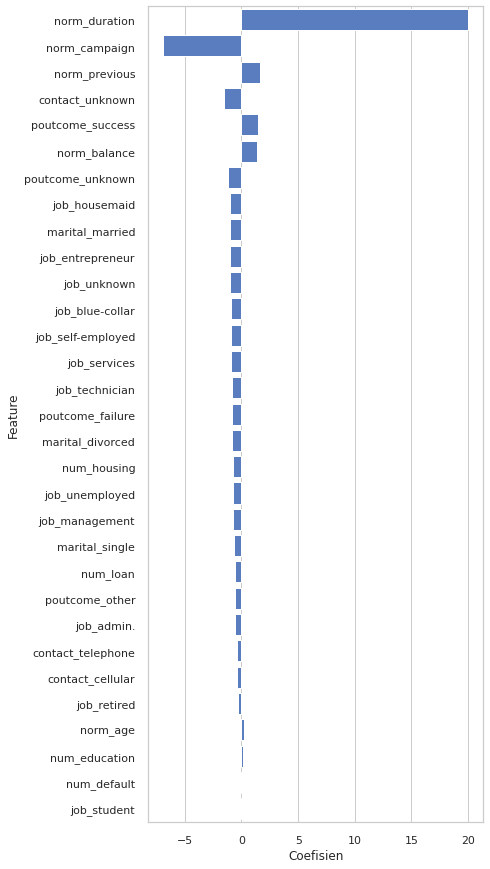

In [ ]:
sns.set(style="whitegrid")

# inisiasi figure
f, ax = plt.subplots(figsize=(6, 15))

# plotting
sns.set_color_codes("muted")
sns.barplot(y = 'Feature', x = 'Coefisien', 
            data=df_fi,
            label="Alcohol-involved", 
            orient = "h",
            color='b')

In [ ]:
df_fi.head(5)

,Feature,Coefisien,abs coef
0,norm_duration,19.970205,19.970205
1,norm_campaign,-6.887040,6.887040
2,norm_previous,1.613842,1.613842
3,contact_unknown,-1.553138,1.553138
4,poutcome_success,1.476634,1.476634


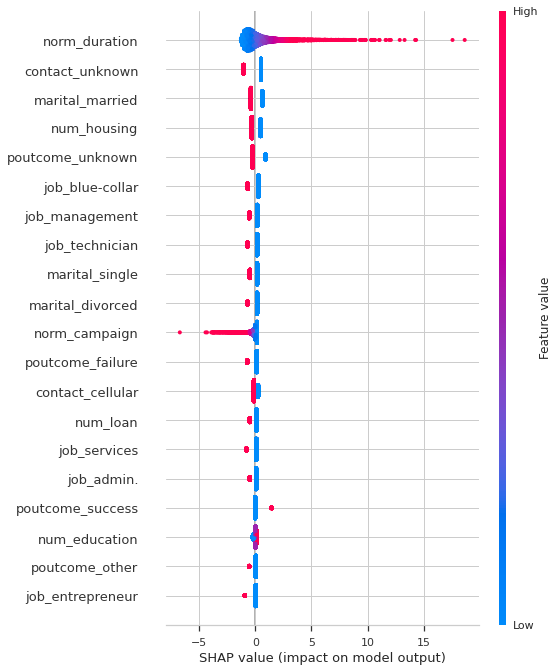

In [ ]:
# feature importance dengan shap
shap.initjs()

explainer = shap.Explainer(logreg, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


Dari informasi di atas didapatkan dua feature importance yang memiliki nilai SHAPE Value yang tinggi dibandingkan feature yang lainnya yaitu duration dan campaign. Kedua fitur ini dapat dijadikan sebagai business recommendation.
* duration   
Mengefisiensikan duration telemarketing dengan cara menyiapkan telemarketer dan scripting agar dapat mengefisiensikan waktu dan biaya. Sehingga impact yang dapat dirasakan adalah cost dari durasi telpon dapat dikurangi.
* campaign  
Durasi campaign yang sering dilakukan kepada nasabah dinilai kurang efektif. Sehingga sarannya adalah memaksimalkan pelaksanaan campaign dengan memastikan segalnya telah disiapkan secara matang. Ketika jumlah campaign berkurang maka cost yang dikeluarkan juga berkurang

<h2> <img src="https://drive.google.com/uc?id=1bgo90aTiOk7BVvo0jBHkkxFrG_UzhJdG"/>
</h2>

## Testing pada data test.csv

Karena hasil Model tanpa penghapusan outliers lebih baik dibandingkan dengan remove outliers sehingga dalam hal ini akan digunakan model dengan tanpa melalui proses remove outliers

In [ ]:
URL_test ='https://drive.google.com/file/d/1Bo1xL_EKtxEBDEnBgrlJK9UYLotLtioW/view?usp=sharing'
test = 'https://drive.google.com/uc?export=download&id='+URL_test.split('/')[-2]
df_test = pd.read_csv(test,delimiter=';')

In [ ]:
df_y = df_test['y'].value_counts()
df_y

no     4000
yes     521
Name: y, dtype: int64

In [ ]:
521/(521+4000)

0.11523999115239991

In [ ]:
4521*7.7

34811.700000000004

In [ ]:
cvr = round(521/(521+4000)*100,2)
print(f'converion rate tanpa Machine Learning adalah: {cvr}%')

converion rate tanpa Machine Learning adalah: 11.52%


In [ ]:
df_test = df_test.drop(['day', 'month','pdays'], axis=1)

In [ ]:
# encoding data test
for i in mzn:
  df_test['num_'+i] = df_test[i].map(m_yn)

#map data test
df_test['num_education'] = df_test['education'].map(m_ed)

#ohe data test
for i in ls_ohe:
  ohe = pd.get_dummies(df_test[i],prefix=i)
  df_test = df_test.join(ohe)

In [ ]:
# Normalisasi
for i in l_num:
  df_test['norm_'+i] = norm.fit_transform(df_test[i].values.reshape(len(df_test),1))

In [ ]:
df_test =   df_test.drop(l_num, axis=1)

In [ ]:
#drop kolom
df_test = df_test.drop(ls_drop, axis=1)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   num_default        4521 non-null   int64  
 1   num_housing        4521 non-null   int64  
 2   num_loan           4521 non-null   int64  
 3   num_y              4521 non-null   int64  
 4   num_education      4521 non-null   int64  
 5   job_admin.         4521 non-null   uint8  
 6   job_blue-collar    4521 non-null   uint8  
 7   job_entrepreneur   4521 non-null   uint8  
 8   job_housemaid      4521 non-null   uint8  
 9   job_management     4521 non-null   uint8  
 10  job_retired        4521 non-null   uint8  
 11  job_self-employed  4521 non-null   uint8  
 12  job_services       4521 non-null   uint8  
 13  job_student        4521 non-null   uint8  
 14  job_technician     4521 non-null   uint8  
 15  job_unemployed     4521 non-null   uint8  
 16  job_unknown        4521 

In [ ]:
#Pemisahan data fitur dan target data test
x_test = df_test.drop('num_y', axis=1)
Y_test = df_test['num_y']
X_test, y_test = x_test, Y_test

In [ ]:
# Menggunakan model 
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(C= 21, penalty = 'l1', solver= 'liblinear') # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.889
Precision (Test Set): 0.515
Recall (Test Set): 0.570
F1-Score (Test Set): 0.541
roc_auc (test-proba): 0.886
roc_auc (train-proba): 0.892
roc_auc (crossval train): 0.893
roc_auc (crossval test): 0.867


### Confusion Matrix

In [ ]:
# Confusion matrix
from sklearn import metrics
y_pred = logreg.predict(X_test)
tn, fp, fn, tp = confusion_matrix(list(y_test), list(y_pred)).ravel()

print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 297
True Negative 3720
False Positive 280
False Negative 224


Text(11.880000000000003, 0.5, 'Real')

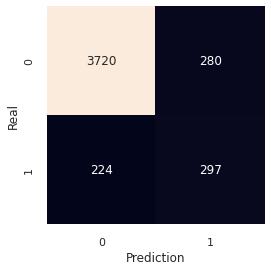

In [ ]:
# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False, fmt="d")
ax.set_xlabel('Prediction')
ax.set_ylabel('Real')

Dari informasi diatas diperoleh bahwa dari model:  
* 297 customer hasil model yang menerima tawaran dan kondisi aktualnya juga menerima tawaran menjadi nasabah deposito.
* 280 customer hasil model yang menerima tawaran tapi kondisi aktualnya adalah menolak tawaran menjadi nasabah deposito.
* 3720 customer hasil model yang tidak menerima tawaran dan kondisi aktualnya juga tidak menerima tawaran menjadi nasabah deposito.
* 224 customer hasil model yang tidak menerima tawaran tapi kondisi aktualnya adalah menerima tawaran menjadi nasabah deposito

### Simulasi Bisnis

* Conversion rate  
`Cr = (Jumlah konversi / Total sesi) x 100%`
* ROI (return on Investment)  

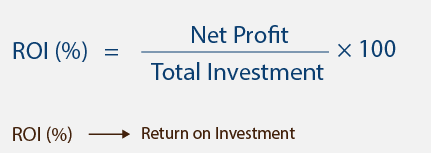

Net Profit : diperoleh dari total pendapatan - cost campaign  
Total Investment:  Cost campaign

In [ ]:
conversion_rate = round((tp/(tp+fp))*100,2)
print(f'conversion rate dari data test.csv adalah sebesar {conversion_rate}%')

conversion rate dari data test.csv adalah sebesar 51.47%


In [ ]:
avg_cost_per_call = 7.7 #EUR 
campaign_cost =(tp+fp) * avg_cost_per_call
print('campaign cost ', campaign_cost)
#Asumsi keuntungan pertahun dari deposito nasabah.
avg_init_deposit = 500 #Asumsi minimum deposito 500 EUR
avg_bank_loan_interest = 13/100 #Berdasarkan data bank di portugal
avg_term_deposit_interest = 0.075/100 #Berdasarkan data bank di portugal
income_from_deposit = avg_init_deposit * (avg_bank_loan_interest - avg_term_deposit_interest) * tp #Asumsi seluruh dana deposito yang diterima dipinjamkan ke nasabah lainnya.
roi = round(((income_from_deposit-campaign_cost) / campaign_cost) * 100,2)
roi2 = income_from_deposit-campaign_cost / campaign_cost
np = income_from_deposit-campaign_cost 
print(f'Return on Investment dari data test.csv adalah sebesar {roi}%')
print(f'Return on Investment dari data test.csv adalah sebesar {roi2} EUR')
print(f'Net Profit dari data test.csv adalah sebesar {np} EUR')

campaign cost  4442.900000000001
Return on Investment dari data test.csv adalah sebesar 332.01%
Return on Investment dari data test.csv adalah sebesar 19192.625 EUR
Net Profit dari data test.csv adalah sebesar 14750.724999999999 EUR


In [ ]:
# perhitungan untuk tanpa Machine learning
campaign_cost_tml = 4521 * avg_cost_per_call
income_from_deposit_tml = avg_init_deposit * (avg_bank_loan_interest - avg_term_deposit_interest) * df_y[1]
roi_tml = round(((income_from_deposit_tml - campaign_cost_tml) / campaign_cost_tml) * 100,2)
roi21 = income_from_deposit_tml - campaign_cost_tml / campaign_cost_tml
np1 = income_from_deposit_tml -campaign_cost_tml
print(f'Return on Investment dari data test.csv adalah sebesar {roi_tml}%')
print(f'Return on Investment dari data test.csv adalah sebesar {roi21} EUR')
print(f'Net Profit dari data test.csv adalah sebesar {np1} EUR')

Return on Investment dari data test.csv adalah sebesar -3.28%
Return on Investment dari data test.csv adalah sebesar 33668.625 EUR
Net Profit dari data test.csv adalah sebesar -1142.0750000000044 EUR


### Kesimpulan
Dari Model dan features importance diperoleh bahwa: 
1. Model yang ditawarkan dapat menghasilkan conversion rate sebesar 51.47%.
2. Return on Investment dari model yang dibuat diperoleh sebesar 332.01 %.


## Testing pada data train.csv

Karena hasil Model tanpa penghapusan outliers lebih baik dibandingkan dengan remove outliers sehingga dalam hal ini akan digunakan model dengan tanpa melalui proses remove outliers

In [ ]:
## data train
URL_train ='https://drive.google.com/file/d/1l21D_27PqZYwf6WWUz671RytUhyAUNMp/view?usp=sharing'
train = 'https://drive.google.com/uc?export=download&id='+URL_train.split('/')[-2]
df_train = pd.read_csv(train,delimiter=';')

In [ ]:
df_y = df_train['y'].value_counts()
df_y

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
df_train = df_train.drop(['day', 'month','pdays'], axis=1)

In [ ]:
# encoding data test
for i in mzn:
  df_train['num_'+i] = df_train[i].map(m_yn)

#map data test
df_train['num_education'] = df_train['education'].map(m_ed)

#ohe data test
for i in ls_ohe:
  ohe = pd.get_dummies(df_train[i],prefix=i)
  df_train = df_train.join(ohe)

In [ ]:
# Normalisasi
for i in l_num:
  df_train['norm_'+i] = norm.fit_transform(df_train[i].values.reshape(len(df_train),1))

In [ ]:
df_train =   df_train.drop(l_num, axis=1)

In [ ]:
#drop kolom
df_train = df_train.drop(ls_drop, axis=1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   num_default        45211 non-null  int64  
 1   num_housing        45211 non-null  int64  
 2   num_loan           45211 non-null  int64  
 3   num_y              45211 non-null  int64  
 4   num_education      45211 non-null  int64  
 5   job_admin.         45211 non-null  uint8  
 6   job_blue-collar    45211 non-null  uint8  
 7   job_entrepreneur   45211 non-null  uint8  
 8   job_housemaid      45211 non-null  uint8  
 9   job_management     45211 non-null  uint8  
 10  job_retired        45211 non-null  uint8  
 11  job_self-employed  45211 non-null  uint8  
 12  job_services       45211 non-null  uint8  
 13  job_student        45211 non-null  uint8  
 14  job_technician     45211 non-null  uint8  
 15  job_unemployed     45211 non-null  uint8  
 16  job_unknown        452

In [ ]:
#Pemisahan data fitur dan target data test
x_test = df_train.drop('num_y', axis=1)
Y_test = df_train['num_y']
X_test, y_test = x_test, Y_test

In [ ]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(C= 21, penalty = 'l1', solver= 'liblinear') # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.900
Precision (Test Set): 0.651
Recall (Test Set): 0.321
F1-Score (Test Set): 0.430
roc_auc (test-proba): 0.891
roc_auc (train-proba): 0.892
roc_auc (crossval train): 0.893
roc_auc (crossval test): 0.867


### Confusion Matrix

In [ ]:
# Confusion Matrix
from sklearn import metrics
y_pred = logreg.predict(X_test)
tn, fp, fn, tp = confusion_matrix(list(y_test), list(y_pred)).ravel()

print('True Positive', tp)
print('True Negative', tn)
print('False Positive', fp)
print('False Negative', fn)

True Positive 1700
True Negative 39009
False Positive 913
False Negative 3589


Text(11.880000000000003, 0.5, 'Real')

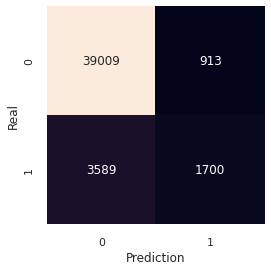

In [ ]:
# Menampilkan confusion matrix dalam bentuk heatmap
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False, fmt="d")
ax.set_xlabel('Prediction')
ax.set_ylabel('Real')

Dari informasi diatas diperoleh bahwa dari model:  
* 1700 customer hasil model yang menerima tawaran dan kondisi aktualnya juga menerima tawaran menjadi nasabah deposito.
* 913 customer hasil model yang menerima tawaran tapi kondisi aktualnya adalah menolak tawaran menjadi nasabah deposito.
* 39009 customer hasil model yang tidak menerima tawaran dan kondisi aktualnya juga tidak menerima tawaran menjadi nasabah deposito.
* 3589 customer hasil model yang tidak menerima tawaran tapi kondisi aktualnya adalah menerima tawaran menjadi nasabah deposito

### Simulasi Bisnis

* Conversion rate  
`Cr = (Jumlah konversi / Total sesi) x 100%`
* ROI (return on Investment)  

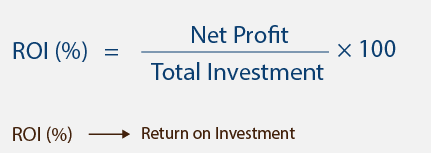

Net Profit : diperoleh dari total pendapatan - cost campaign  
Total Investment:  Cost campaign

In [ ]:
conversion_rate = round((tp/(tp+fp))*100,2)
print(f'conversion rate dari data test.csv adalah sebesar {conversion_rate}%')

conversion rate dari data test.csv adalah sebesar 65.06%


In [ ]:
avg_cost_per_call = 7.7 #EUR 
campaign_cost =(tp+fp) * avg_cost_per_call
print('campaign cost ', campaign_cost)
#Asumsi keuntungan pertahun dari deposito nasabah.
avg_init_deposit = 500 #Asumsi minimum deposito 500 EUR
avg_bank_loan_interest = 13/100 #Berdasarkan data bank di portugal
avg_term_deposit_interest = 0.075/100 #Berdasarkan data bank di portugal
income_from_deposit = avg_init_deposit * (avg_bank_loan_interest - avg_term_deposit_interest) * tp #Asumsi seluruh dana deposito yang diterima dipinjamkan ke nasabah lainnya.
roi = round(((income_from_deposit-campaign_cost) / campaign_cost) * 100,2)
roi2 = income_from_deposit-campaign_cost / campaign_cost
np = income_from_deposit-campaign_cost 
print(f'Return on Investment dari data test.csv adalah sebesar {roi}%')
print(f'Return on Investment dari data test.csv adalah sebesar {roi2} EUR')
print(f'Net Profit dari data test.csv adalah sebesar {np} EUR')

campaign cost  20120.100000000002
Return on Investment dari data test.csv adalah sebesar 446.03%
Return on Investment dari data test.csv adalah sebesar 109861.5 EUR
Net Profit dari data test.csv adalah sebesar 89742.4 EUR


In [ ]:
# perhitungan untuk tanpa Machine learning
campaign_cost_tml = len(df_train) * avg_cost_per_call
income_from_deposit_tml = avg_init_deposit * (avg_bank_loan_interest - avg_term_deposit_interest) * df_y[1]
roi_tml = round(((income_from_deposit_tml - campaign_cost_tml) / campaign_cost_tml) * 100,2)
roi21 = income_from_deposit_tml - campaign_cost_tml / campaign_cost_tml
np1 = income_from_deposit_tml -campaign_cost_tml
print(f'Return on Investment dari data test.csv adalah sebesar {roi_tml}%')
print(f'Return on Investment dari data test.csv adalah sebesar {roi21} EUR')
print(f'Net Profit dari data test.csv adalah sebesar {np1} EUR')

Return on Investment dari data test.csv adalah sebesar -1.82%
Return on Investment dari data test.csv adalah sebesar 341800.625 EUR
Net Profit dari data test.csv adalah sebesar -6323.075000000012 EUR


### Kesimpulan
Dari Model dan features importance diperoleh bahwa: 
1. Model yang ditawarkan dapat menghasilkan conversion rate sebesar 65.06%.
2. Return on Investment dari model yang dibuat diperoleh sebesar 446.03%.


<h2> <img src="https://drive.google.com/uc?id=14lOCz4syo7YKQIoUEV3IGKxwvogRj_5r"/>
</h2>

## Business Recommendation

1. Divisi marketing dapat mengefisiensikan lagi durasi telemarketing dengan cara menyiapkan telemarketer dan scriptting agar dapat mengurangi cost yang dikeluarkan.
2. Durasi campaign yang dilakukan disarankan hanya 1-3 kali saja karena mengingat bahwa lebih dari itu customer cenderung tidak menerima tawaran menjadi nasabah. Selain itu, mengurangi jumlah campaign juga dapat mengurangi cost.

<h2> <img src="https://drive.google.com/uc?id=1UFhjyfoYFiwpqbHLh9NrrHOyA0YF1nvU"/>
</h2>